<h>
<img src="lol_cover.jpg",width=800,height=500, class="center">
</h>
<h1 style="text-align:center;">  
    <font size="+3">Analyzing the Top NALCS Players in League of Legends</font> 
</h1>
<h4 style="text-align:center;">  
    Kristine Rodrigo, Allen Liu, Shenji Qiu
</h4> <hr>
    
<h1 style="text-align:center;">
    <font size="+2">Introduction</font>
</h1> 
<br>
    League of Legends (LoL) is a fast-paced, competitive Multiplayer Online Battle Arena (MOBA) video game developed and published by Riot Games in 2009. The game's user-friendly interface, variety of champions, and competitive and strategic nature as just some of the many reasons League of Legends has gained popularity over the years, acquiring on average 27 million active players a day. Riot Games established the first World Championship series in 2011 and in only two years, had 32 millions viewers tuned in to watch the game, compared to the 15.1 million who watched the NBA Finals in that year. It is undeniable that the gaining popularity of League of Legends helped push the rise of Esports. League of Legends continues to grow, bringing in a larger fan-base and revenue with each passing year.<br> <br>
    Although the game offers several game modes, the Championship Series utilizes the classic game mode. Two teams of five compete to destroy each other's Nexus located at the enemy's base. The map is composed of three lanes, top, mid, and bottom, as well as a jungle spread throughout the middle of the map (as shown in the figure below).Each team has five different positions, Top, Mid, Bottom, Support, and Jungle. Each team member chooses to play from a vast selection of champions with their own unique skills and strengths. (More information regarding the rules can be found <a href="https://na.leagueoflegends.com/en/featured/new-player-guide?source=https://na.leagueoflegends.com/en/site/guide/#/?_k=l5hkd0 ">here</a>)      
    <img src="lol_map.jpg",width=500,height=500> <br>
    The different positions, strategies, and champions can make the game difficult to understand, but when mastered, players can be rewarded immensely. The championship series rewards the winning team over five million dollars and the average player makes a six-figure income. In this tutorial, our goal is to tidy in-game data of professional league players in the North American League Championship Series(NALCS) from 2015-2018. We will then analyze the data in order to find out whether professional players win because of the champions they pick or because of their own talent. In order to figure this out, we will analyze their match performances with champions and compare it with the overall performance of that champion they selected. We will only be looking at three team positions for this analysis: Top-Lane, Middle-Lane, and Jungle. However, we encourage readers to analyze the other positions as well, since they are all vital components in winning a game of League. We hope our analysis of the game sparks an interest for people unfamiliar with League of Legends. We also hope to shed a light on the intricacies behind winning a game in League of Legends. <br>
<h2> Outline </h2>
<ol>
    <li><a href='#1'>Getting Started</a>
    <ul><li>1.1 Required Libraries</li>
        <li>1.2 Dataset Source</li>
        <li>1.3 Load and View Data</li>
    </ul>
  </li> 
    <li><a href='#2'>Tidying and Modifying the Data</a>
        <ul>
        <li>2.1 Top-Lane Players</li>
        <li>2.2 Middle-Lane Players</li>
        <li>2.3 Jungle Players</li>
        <li>2.4 Try it Yourself!</li>    
        </ul>
    </li>
    <li><a href='#3'>Exploratory Data Analysis</a>
        <ul>
        <li>3.1 Top-Lane Players</li>
        <li>3.2 Middle-Lane Players</li>
        <li>3.3 Jungle Players</li>
        <li>3.4 Try it Yourself!</li>    
        </ul>
    </li>
    <li><a href='#4'>Conclusion and Evaluation</a></li>
</ol>
<hr>

<a id='1'></a>
<h2>1. Getting Started </h2> 

<h3>1.1 Required Libraries</h3>
<p>Python 3 has several useful libraries for data analysis. Some of the ones we will be using are: <br>
    <ul>
        <li><a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>: Used for displaying data and partitioning</li>
        <li><a href="https://docs.scipy.org/doc/numpy/user/">numpy</a>: Used for scientific computing with Python </li>
        <li><a href="https://matplotlib.org/contents.html">matplotlib</a>: Used to create graphs and charts from Pandas data</li>
        <li><a href="https://seaborn.pydata.org/"> seaborn</a>: Provides a high-level iinterface for graphics on top of Matplotlib</li> 
        <li><a href="http://scikit-learn.org/stable/documentation.html">scikit-learn</a>: Used to create linear-models, model selections, and other regression analysis tools</li>
        </ul>
</p> 

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import math
import re
import warnings
from sklearn import linear_model

<h3>1.2 Dataset Source</h3>
<p>
    The dataset used kept record of all the statistics of League of Legends competitive matches between they years, 2015-2018. The matches include several different leagues (NALCS, EULCS,LCK, etc.) as well as the World Championship and Mid-Seaon Invitational Tournaments.This dataset was found on Kaggle, an online community for data scientists and machine learners. Kaggle allows users to share, find, and explore datasets and build models in a web-based data-science environment.<br><br> 
    The data release we will be using contains several CSV (Comma Separated Value) files that we will use in our analysis of competitive matches in the Championship Series. You can download the free data release <a href= "https://www.kaggle.com/chuckephron/leagueoflegends/downloads/leagueoflegends.zip/7">here</a>. <br><br>
The zip file contains the following CSV files:
<ul>
    <li><b>_columns.csv:</b> Contains the definition of all the labels for the CSV files</li>
    <li><b>bans.csv:</b> Contains the Champions banned for each match</li>
    <li><b>gold.csv:</b> Contains the Differences in gold earned every minute between the teams for each match</li>
    <li><b>kills.csv:</b> Contains the information on Champion kills for each match</li>
    <li><b>LeagueofLegends.csv:</b> Contains the overall statistics of each match</li>
    <li><b>matchinfo.csv:</b> Contains each professional player's information for each match</li>
    <li><b>monsters.csv:</b> Contains death information of monsters for each match</li>
    <li><b>structures.csv:</b> Contains information on when each tower was destroyed for each match</li>
</ul>
</p>
<div class="alert alert-block alert-info">
<b>Note:</b> Make sure the CSV files are in the same folder as your notebook before proceeding.
</div>
<h3>1.3 Load and View Data</h3>
<p>
    Load the csv file and display the first 5 rows to get a sense of what is contained in the dataset. For this analysis, we will only be using the Leagueof Legends csv file and kills csv, as it contains compressed versions of the other csv files inside.
</p>

In [335]:
#Transforms the csv files into pandas dataframes
lcs_matches = pd.read_csv('LeagueofLegends.csv')
kills = pd.read_csv('kills.csv')
#Displays the lcs_matches dataframe
lcs_matches.head(5)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


<a id='2'></a>
<h2>2. Tidying and Modifying the Data</h2><br>
Now that you have the data, we can start tidying and modifying the dataframe to prepare it for analysis. The current csv file compresses all the match information into rows. However, since we are analyzing the professional players and not the matches itself, we will need to modify the data to create new dataframes for each position, Top, Middle, Bottom, Jungle, and Support and professional players who play these roles. More information on the different kinds of roles can be found <a href="https://www.lol-smurfs.com/blog/lol-roles-explained/">here</a>.   

For the most part, the most important advantages a player has in the game is the amount of gold they earned which they can use to buy items that give them buffs and make their champions stronger and their KDA(Kills/Deaths/Assists )statistics. Some positions have other attributes unique to their position that need to be analyzed but we will go in depth with that later on.   Since we are only looking at the NALCS, we can remove any of the matches that are not part of the NALCS as well 

In [298]:
#Keeps NALCS matches in the dataframe only
lcs_matches = lcs_matches.loc[lcs_matches["League"] == "NALCS"]
#Displays the first four entries in the dataframe
lcs_matches.head(4)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...


<h3>2.1 Top-Lane Players</h3><br>
<img src="top.png",width=400,height=400><br>
Despite being slow and inflict small damage,Top Lane champions soak up damage from other champions and help crowd control as well as stun the enemies bottom-lane player. Top Laners are known as Tanks and have great defense. We will create a dataframe that holds the necessary information for analysis. Important columns to keep include: goldblueTop, blueTop, goldredtop, redTop, goldblue, goldred, bKills, and rKills. Definitions for these columns can be found in the _columns.csv file. 

In [299]:
#Retrieve only the player names, the champion they used, the amount of gold they farmed over time; 
blue_top = lcs_matches.loc[:, lcs_matches.columns.isin(['blueTop','blueTopChamp','goldblueTop', 'goldblue', 'gamelength'])]
red_top = lcs_matches.loc[:, lcs_matches.columns.isin(['redTop','redTopChamp','goldredTop', 'goldred', 'gamelength'])]
blue_top.head(5)

,gamelength,goldblue,blueTop,blueTopChamp,goldblueTop
0,40,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...",Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18..."
1,38,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...",Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2..."
2,40,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...",Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21..."
3,41,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...",Rhux,Irelia,"[475, 475, 532, 646, 992, 1253, 1408, 1752, 21..."
4,35,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...",Benny,Gnar,"[475, 475, 532, 733, 1038, 1258, 1546, 1850, 2..."


Now that we have the necessary information. We need to format th dataframe so that the data is considered tidy. Notice that goldblueTop, goldblue, and bKills store arrays. This will hinder further analysis since the cell contains multiple information. We need to change the values in this cell so that it contains only one piece of information for that player. We do not need the gold the player has for every minute. So instead, we will make a new column with the player's average gold per minute. We will also do that same thing for the team's total gold.

In [300]:
blueTeamGoldPerMin = []
goldPerMin = []

# Go through each row of blue team top first and gather data
for row in blue_top.iterrows():
    # Strip "[" , "]", and "," from the row that contain information
    # on the gold each player farmed throughout the game.
    strList = row[1]["goldblueTop"]
    strList = strList.strip('[').strip(']').replace(',', '').split()
    # Convert the list of integers in string format into a list of integers.
    strList = [int(i) for i in  strList]
    # Calculate the difference of the gold they farmed
    strList = np.diff(strList)
    # Calculate the gold per min by dividing the difference the player
    # earned with the game length.
    game_length = row[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))
    
    # Do the same thing but to calculate the gold per min of the whole team
    teamStrList = row[1][1].strip('[').strip(']').replace(',', '').split()
    teamStrList = [int(i) for i in  teamStrList]
    teamStrList = np.diff(teamStrList)
    blueTeamGoldPerMin.append(math.ceil(sum(teamStrList)/game_length))

#Since we are using commands from previous python versions, we will ignore warnings for them
warnings.filterwarnings("ignore")

# create new columns, GPM(Gold Per Min), teamGPM (Team Gold Per Min), and
# update the blue_top dataframe with the updated data. We change names of the columns to
# concatenate with the red team later.
blue_top.rename(columns={'blueTop':'topPlayer'}, inplace=True)
blue_top.rename(columns={'blueTopChamp':'topChamp'}, inplace=True)
blue_top['GPM'] = goldPerMin
blue_top['teamGPM'] = blueTeamGoldPerMin
blue_top.head(5)

,gamelength,goldblue,topPlayer,topChamp,goldblueTop,GPM,teamGPM
0,40,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...",Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18...",302,1508
1,38,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...",Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",313,1455
2,40,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...",Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21...",350,1697
3,41,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...",Rhux,Irelia,"[475, 475, 532, 646, 992, 1253, 1408, 1752, 21...",301,1371
4,35,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...",Benny,Gnar,"[475, 475, 532, 733, 1038, 1258, 1546, 1850, 2...",315,1653


Now, we will do the exact same thing with the red team top champions as well. When we finish, we can merge the two datasets into one giant dataset, since the color of the team that the players played on does not matter. Again, we are looking at the individual players performances, not the matches themselves.

In [301]:
# We will do the same for red team top
redTeamGoldPerMin = []
goldPerMin = []

for i in red_top.iterrows():
    strList = i[1][4].strip('[').strip(']').replace(',', '').split()
    strList = [int(i) for i in  strList]
    strList = np.diff(strList)
    game_length = i[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))
    
    # Calculate team gold per min
    teamStrList = i[1][1].strip('[').strip(']').replace(',', '').split()
    teamStrList = [int(i) for i in  teamStrList]
    teamStrList = np.diff(teamStrList)
    redTeamGoldPerMin.append(math.ceil(sum(teamStrList)/game_length))

red_top.rename(columns={'redTop':'topPlayer'}, inplace=True)
red_top.rename(columns={'redTopChamp':'topChamp'}, inplace=True)
red_top['GPM'] = goldPerMin
red_top['teamGPM'] = redTeamGoldPerMin
# Remove unnecessary columns
blue_top = blue_top.drop(columns = ['goldblueTop', 'goldblue'])
red_top = red_top.drop(columns = ['goldredTop', 'goldred'])

#Concatenates the two dataframes and stacks them to create one giant dataframe for top players.
topDf = [blue_top, red_top]
all_top = pd.concat(topDf, sort=True)
all_top.head(5)

,GPM,gamelength,teamGPM,topChamp,topPlayer
0,302,40,1508,Irelia,Dyrus
1,313,38,1455,Gnar,Cris
2,350,40,1697,Renekton,Flaresz
3,301,41,1371,Irelia,Rhux
4,315,35,1653,Gnar,Benny


Now, we will add the Kills, Deaths, and Assists column into the dataframe. To start we will merge the Kills dataframe with the lcs_matches dataframe. Note that each column of the lcs_matches represents a match and that each match has its own unique address. Therefore, when we merge the two datasets, the proper kills information lines up with the topPlayer since they merge on the Address column.

In [302]:
#Adds the match addresses back into blue_top column
blue_top['Address'] = lcs_matches['Address']
result = pd.merge(blue_top,kills[['Killer', 'Assist_1', 'Assist_2','Assist_3','Assist_4', 'Address']],on='Address')
result.head(5)

,gamelength,topPlayer,topChamp,GPM,teamGPM,Address,Killer,Assist_1,Assist_2,Assist_3,Assist_4
0,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,NaN,NaN,NaN,NaN
1,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN
2,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN
3,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy
4,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy


Each row of the results dataframe represents one death in a match. Therefore, matches will have multiple entires proportionate to the amount of total kills in that game from both the red team and blue team. Looking at this dataframe, you can see that the new columns we added from the kills dataframe contained <b> NaN</b> values. We need to change these to string type values to keep the type consistent throughout the columns. We also will change the kills dataframe's <b>"Victim"</b> column which we will need to count each player's death in a match

In [303]:
#Replaces all the null values with empty strings in the following columns
result.Killer = result.Killer.replace(np.nan,"")
kills.Victim = kills.Victim.replace(np.nan,"")
result.Assist_1 = result.Assist_1.replace(np.nan,"")
result.Assist_2 = result.Assist_2.replace(np.nan,"")
result.Assist_3 = result.Assist_3.replace(np.nan,"")
result.Assist_4 = result.Assist_4.replace(np.nan,"")

Now, we are ready to calculate the Kills, Deaths, and Assists for the Top Champion. We will pull out each Top champ's match information and count the amount of kills and Assists they have done. We will add their total count to a list which we will later add as the Kills and Assists column on the blue_top dataframe. For deaths, we need to see how many times that Top Champion appeared in the kill information of the opponent team in that match. 

<div class="alert alert-block alert-info">
<b>Note:</b> Since the blue_top and results array are in the same order for matches, the Kills and Assists columns will line up perfectly when we add the new column onto the dataframe. The Deaths column will align since each match address is unique and we are again going in the order of the results matches.  
</div>

In [304]:
#Creates an array that will keep the KDA counts for all Top Players
blue_top_kills = []
blue_top_assists = []
blue_top_deaths = []
#Goes through every match and pulls the blue_team's Top Champion's Kills, Deaths, and Assists information
for match in result['Address'].unique():
    #Pulls the kill information for the cetain match
    top_kills = result.loc[result['Address'] == match]
    #Pulls the opponent team's kill information from that match
    top_deaths = kills.loc[kills["Address"] == match]
    top_deaths = top_deaths.loc[top_deaths["Team"] == 'rKills']
    kcount = 0
    acount = 0
    dcount = 0
    #Resets the index when pulling out the kill information
    top_kills = top_kills.reset_index(drop = True)
    top_deaths = top_deaths.reset_index(drop = True)
    #Goes through every kill and counts how many times the Blue Top Champ made a kill, assist, or died and adds the total count
    #into the appropriate list
    for i in range(0,len(top_kills)):
        if top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Killer']:
            kcount +=1
        if top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_1'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_2'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_3'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_4']:
            acount +=1
    for i in range(0,len(top_deaths)):
        if top_kills['topPlayer'][0] in top_deaths.loc[i]['Victim']:
            dcount +=1
    blue_top_kills.append(kcount)
    blue_top_assists.append(acount)
    blue_top_deaths.append(dcount)
#Appends the lists into the blue top dataframe
blue_top['Kills'] = blue_top_kills
blue_top["Assists"] = blue_top_assists
blue_top['Deaths'] = blue_top_deaths
blue_top.head()

,gamelength,topPlayer,topChamp,GPM,teamGPM,Address,Kills,Assists,Deaths
0,40,Dyrus,Irelia,302,1508,http://matchhistory.na.leagueoflegends.com/en/...,2,8,3
1,38,Cris,Gnar,313,1455,http://matchhistory.na.leagueoflegends.com/en/...,3,3,0
2,40,Flaresz,Renekton,350,1697,http://matchhistory.na.leagueoflegends.com/en/...,3,10,0
3,41,Rhux,Irelia,301,1371,http://matchhistory.na.leagueoflegends.com/en/...,4,3,3
4,35,Benny,Gnar,315,1653,http://matchhistory.na.leagueoflegends.com/en/...,2,14,2


We will do the same thing for the red Top Champions. They again will have the same addresses as the lcs_matches since they line up as well. After we create the new columns, we will concatenate the red and blue columns again. We can drop the address column as well since we will not be using that.
<div class="alert alert-block alert-info">
<b>Note:</b> Make sure the column names are the same when you call the concat method, so that the columns from the two dataframes line up.
</div>

In [305]:
red_top['Address'] = lcs_matches['Address']
result = pd.merge(red_top,kills[['Killer', 'Assist_1', 'Assist_2','Assist_3','Assist_4', 'Address']],on='Address')
#Replaces null values with empty strings
result.Killer = result.Killer.replace(np.nan,"")
kills.Victim = kills.Victim.replace(np.nan,"")
result.Assist_1 = result.Assist_1.replace(np.nan,"")
result.Assist_2 = result.Assist_2.replace(np.nan,"")
result.Assist_3 = result.Assist_3.replace(np.nan,"")
result.Assist_4 = result.Assist_4.replace(np.nan,"")

#Counts the KDA info for each player for each match
red_top_kills = []
red_top_assists = []
red_top_deaths = []
for match in result['Address'].unique():
    top_kills = result.loc[result['Address'] == match]
    top_deaths = kills.loc[kills["Address"] == match]
    top_deaths = top_deaths.loc[top_deaths["Team"] == 'bKills']
    kcount = 0
    acount = 0
    dcount = 0
    top_kills = top_kills.reset_index(drop = True)
    top_deaths = top_deaths.reset_index(drop = True)
    for i in range(0,len(top_kills)):
        if top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Killer']:
            kcount +=1
        if top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_1'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_2'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_3'] or top_kills.loc[i]["topPlayer"] in top_kills.loc[i]['Assist_4']:
            acount +=1
    for i in range(0,len(top_deaths)):
        if top_kills['topPlayer'][0] in top_deaths.loc[i]['Victim']:
            dcount +=1
    red_top_kills.append(kcount)
    red_top_assists.append(acount)
    red_top_deaths.append(dcount)
red_top['Kills'] = red_top_kills
red_top["Assists"] = red_top_assists
red_top['Deaths'] = red_top_deaths

#Combines the two dataframes into one giant one
topDf = [blue_top, red_top]
all_top = pd.concat(topDf, sort=False)
all_top = all_top.drop(columns = 'Address')
all_top.head(5)

,gamelength,topPlayer,topChamp,GPM,teamGPM,Kills,Assists,Deaths
0,40,Dyrus,Irelia,302,1508,2,8,3
1,38,Cris,Gnar,313,1455,3,3,0
2,40,Flaresz,Renekton,350,1697,3,10,0
3,41,Rhux,Irelia,301,1371,4,3,3
4,35,Benny,Gnar,315,1653,2,14,2


<h3>2.2 Middle-Lane Players</h3>
<img src="mid.jpg",width=400,height=400><br>
The mid-lane player is also known as the APC (Ability Power Carry). This lane does not require alot of support from others and are capable of dealing alot of damage. This role plays on their own in order to get the maximum experience points(XP) as fast as possible.

To start, lets pull out all the professional Mid-lane players and create a new dataframe. The valuable information for the middle champion is the same as the top champion: gold earned and KDA. Therefore, we will follow the same process as the Top-Lane data cleaning. However, we will not need to calculate the total gold for each team again, since w ehave already done that.

In [392]:
#Retrieve only the player names, the champion they used, the amount of gold they farmed over time; 
blue_mid = lcs_matches.loc[:, lcs_matches.columns.isin(['blueMiddle','blueMiddleChamp','goldblueMiddle', 'gamelength'])]
red_mid = lcs_matches.loc[:, lcs_matches.columns.isin(['redMiddle','redMiddleChamp','goldredMiddle', 'gamelength'])]
blue_mid.head(5)

,gamelength,blueMiddle,blueMiddleChamp,goldblueMiddle
0,40,Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2..."
1,38,Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2..."
2,40,Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2..."
3,41,XiaoWeiXiao,Leblanc,"[475, 475, 532, 801, 1066, 1409, 1660, 2077, 2..."
4,35,Link,Lissandra,"[475, 475, 532, 802, 1112, 1409, 1737, 1939, 2..."


<h5>Gold Calculations for Middle Champion</b>

In [307]:
goldPerMin = []

# Go through each row of blue team mid first and gather data
for row in blue_mid.iterrows():
    # Strip "[" , "]", and "," from the row that contain information
    # on the gold each player farmed throughout the game.
    strList = row[1]["goldblueMiddle"]
    strList = strList.strip('[').strip(']').replace(',', '').split()
    # Convert the list of integers in string format into a list of integers.
    strList = [int(i) for i in  strList]
    # Calculate the difference of the gold they farmed
    strList = np.diff(strList)
    # Calculate the gold per min by dividing the difference the player
    # earned with the game length.
    game_length = row[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))

# Creates the folliwing new columns: GPM(Gold Per Min) and teamGPM (Team Gold Per Min), and
# updates the blue_top dataframe with the updated data. We change names of the columns to
# concatenate with the red team later.
blue_mid.rename(columns={'blueMiddle':'middlePlayer'}, inplace=True)
blue_mid.rename(columns={'blueMiddleChamp':'middleChamp'}, inplace=True)
blue_mid['GPM'] = goldPerMin
blue_mid.head(5)

,gamelength,middlePlayer,middleChamp,goldblueMiddle,GPM
0,40,Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...",368
1,38,Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",344
2,40,Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2...",376
3,41,XiaoWeiXiao,Leblanc,"[475, 475, 532, 801, 1066, 1409, 1660, 2077, 2...",302
4,35,Link,Lissandra,"[475, 475, 532, 802, 1112, 1409, 1737, 1939, 2...",381


Now, for the Red Middle Champions:

In [308]:
# We will do the same for red team top
goldPerMin = []

# Go through each row of red team mid and gather data
for row in red_mid.iterrows():
    strList = row[1]["goldredMiddle"]
    strList = strList.strip('[').strip(']').replace(',', '').split()
    strList = [int(i) for i in  strList]
    strList = np.diff(strList)
    game_length = row[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))

red_mid.rename(columns={'redMiddle':'middlePlayer'}, inplace=True)
red_mid.rename(columns={'redMiddleChamp':'middleChamp'}, inplace=True)
red_mid['GPM'] = goldPerMin

# Remove unnecessary columns
blue_mid = blue_mid.drop(columns = ['goldblueMiddle'])
red_mid = red_mid.drop(columns = ['goldredMiddle'])

#Concatenates the two dataframes and stacks them to create one giant dataframe for mid players.
topDf = [blue_mid, red_mid]
all_mid = pd.concat(topDf, sort=True)
#Adds the total gold GPM
all_mid["teamGPM"] = all_top['teamGPM']
all_mid.head(5)

,GPM,gamelength,middleChamp,middlePlayer,teamGPM
0,368,40,Ahri,Bjergsen,1508
1,344,38,Ahri,Jesiz,1455
2,376,40,Fizz,Pobelter,1697
3,302,41,Leblanc,XiaoWeiXiao,1371
4,381,35,Lissandra,Link,1653


<h4>Kills,Deaths,Assists Calculations of Middle Champs</h4>

In [309]:
#Adds the match addresses back into blue_mid column
blue_mid['Address'] = lcs_matches['Address']
result = pd.merge(blue_mid,kills[['Killer', 'Assist_1', 'Assist_2','Assist_3','Assist_4', 'Address']],on='Address')

#Replaces all the null values with empty strings in the following columns
result.Killer = result.Killer.replace(np.nan,"")
kills.Victim = kills.Victim.replace(np.nan,"")
result.Assist_1 = result.Assist_1.replace(np.nan,"")
result.Assist_2 = result.Assist_2.replace(np.nan,"")
result.Assist_3 = result.Assist_3.replace(np.nan,"")
result.Assist_4 = result.Assist_4.replace(np.nan,"")

blue_mid_kills = []
blue_mid_assists = []
blue_mid_deaths = []
#Goes through every match and pulls the blue_team's Mid Champion's Kills, Deaths, and Assists information
for match in result['Address'].unique():
    #Pulls the kill information for the cetain match
    mid_kills = result.loc[result['Address'] == match]
    #Pulls the opponent team's kill information from that match
    mid_deaths = kills.loc[kills["Address"] == match]
    mid_deaths = mid_deaths.loc[mid_deaths["Team"] == 'rKills']
    kcount = 0
    acount = 0
    dcount = 0
    #Resets the index when pulling out the kill information
    mid_kills = mid_kills.reset_index(drop = True)
    mid_deaths = mid_deaths.reset_index(drop = True)
    #Goes through every kill and counts how many times the Blue Middle Champ made a kill, assist, or died and adds the total count
    #into the appropriate list
    for i in range(0,len(mid_kills)):
        if mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Killer']:
            kcount +=1
        if mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_1'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_2'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_3'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_4']:
            acount +=1
    for i in range(0,len(mid_deaths)):
        if mid_kills['middlePlayer'][0] in mid_deaths.loc[i]['Victim']:
            dcount +=1
    blue_mid_kills.append(kcount)
    blue_mid_assists.append(acount)
    blue_mid_deaths.append(dcount)
#Appends the lists into the blue mid dataframe
blue_mid['Kills'] = blue_mid_kills
blue_mid["Assists"] = blue_mid_assists
blue_mid['Deaths'] = blue_mid_deaths
blue_mid.head()

,gamelength,middlePlayer,middleChamp,GPM,Address,Kills,Assists,Deaths
0,40,Bjergsen,Ahri,368,http://matchhistory.na.leagueoflegends.com/en/...,8,8,0
1,38,Jesiz,Ahri,344,http://matchhistory.na.leagueoflegends.com/en/...,4,1,3
2,40,Pobelter,Fizz,376,http://matchhistory.na.leagueoflegends.com/en/...,7,6,0
3,41,XiaoWeiXiao,Leblanc,302,http://matchhistory.na.leagueoflegends.com/en/...,4,3,5
4,35,Link,Lissandra,381,http://matchhistory.na.leagueoflegends.com/en/...,9,10,3


Now for the Red Middle Champions:

In [338]:
red_mid['Address'] = lcs_matches['Address']
result = pd.merge(red_mid,kills[['Killer', 'Assist_1', 'Assist_2','Assist_3','Assist_4', 'Address']],on='Address')
#Replaces null values with empty strings
result.Killer = result.Killer.replace(np.nan,"")
kills.Victim = kills.Victim.replace(np.nan,"")
result.Assist_1 = result.Assist_1.replace(np.nan,"")
result.Assist_2 = result.Assist_2.replace(np.nan,"")
result.Assist_3 = result.Assist_3.replace(np.nan,"")
result.Assist_4 = result.Assist_4.replace(np.nan,"")

#Counts the KDA info for each player for each match
red_mid_kills = []
red_mid_assists = []
red_mid_deaths = []
for match in result['Address'].unique():
    mid_kills = result.loc[result['Address'] == match]
    mid_deaths = kills.loc[kills["Address"] == match]
    mid_deaths = mid_deaths.loc[mid_deaths["Team"] == 'bKills']
    kcount = 0
    acount = 0
    dcount = 0
    mid_kills = mid_kills.reset_index(drop = True)
    mid_deaths = mid_deaths.reset_index(drop = True)
    for i in range(0,len(mid_kills)):
        if mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Killer']:
            kcount +=1
        if mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_1'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_2'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_3'] or mid_kills.loc[i]["middlePlayer"] in mid_kills.loc[i]['Assist_4']:
            acount +=1
    for i in range(0,len(mid_deaths)):
        if mid_kills['middlePlayer'][0] in mid_deaths.loc[i]['Victim']:
            dcount +=1
    red_mid_kills.append(kcount)
    red_mid_assists.append(acount)
    red_mid_deaths.append(dcount)
red_mid['Kills'] = red_mid_kills
red_mid["Assists"] = red_mid_assists
red_mid['Deaths'] = red_mid_deaths

#Combines the two dataframes into one giant one
midDf = [blue_mid, red_mid]
all_mid = pd.concat(midDf, sort=False)
all_mid = all_mid.drop(columns = 'Address')
all_mid['teamGPM'] = all_top['teamGPM']
all_mid.head(5)

,gamelength,middlePlayer,middleChamp,GPM,Kills,Assists,Deaths,teamGPM
0,40,Bjergsen,Ahri,368,8,8,0,1508
1,38,Jesiz,Ahri,344,4,1,3,1455
2,40,Pobelter,Fizz,376,7,6,0,1697
3,41,XiaoWeiXiao,Leblanc,302,4,3,5,1371
4,35,Link,Lissandra,381,9,10,3,1653


<h3>2.4 Jungle Players</h3>
<img src="jung.jpg",width=400,height=400><br>
Jungle Players have a unique role as they don't have a lane they stick to, like the other roles we have analyzed. They are in charge of utilizing the jungle camps, gaining buffs for their teams, and provides support for all lanes. It is a highly mobile position, damage-heavy, gap-closing role. <br><br>
Again, the KDA and GPM are important attributes that need to be calculated. But the statistics on Barons, Dragons, and Heralds are also important for this position. As these monsters can provide huge advatanges for the team.We will start by copying over the necessary columns from the lcs_matches dataframe into the new jungle dataframe

In [361]:
# Retrieve only the player names, the champion they used, the amount of gold they farmed over time; 
# and the number of barons, dragons, and heralds for both red and blue teams.
blue_jung = lcs_matches.loc[:, lcs_matches.columns.isin(['rKills','blueJungle','blueJungleChamp','goldblueJungle','bBarons','bDragons','bHeralds','gamelength','bKills'])]
red_jung = lcs_matches.loc[:, lcs_matches.columns.isin(['bKills','redJungle','redJungleChamp','goldredJungle','rBarons','rDragons','rHeralds','gamelength','rKills'])]

Now, we will calculate the Kills,Deaths,Assists,GPM, and number of monsters killed. In this section, we are displaying another way to collect the KDA, different from the previous method.

In [362]:
# goldPerMin, numDrags, numBarons, and numHeralds will help store data
# which will be updated onto the dataframe. 
goldPerMin = []
numDrags = []
numBarons = []
numHeralds = []
num_ckills = []
num_deaths = []
num_assists = []
# Go through each row of blue team jungle first and gather data
for i in blue_jung.iterrows():
    #Kill Count
    kill = re.findall(r"\d*\.\d*\, \'\S*\s\S*\'\,\s\'\S*\s\S*\'",i[1][1])
    count = 0
    for i2 in kill:
        killer = re.findall(r"\S*\'$",i2)
        if(killer[0].strip("'") == i[1][6]):
            count+=1
    ckills = count
    num_ckills.append(ckills)
    count = 0
    #Death Count
    death = re.findall(r"\d*\.\d*\, \'\S*\s\S*\'\,\s\'\S*\s\S*\'",i[1][5])
    for i2 in death:
        dead = re.findall(r"\S*\'\,",i2)
        if(dead[0].replace("'", '').strip(",") == i[1][6]):
            count+=1
    deaths = count
    num_deaths.append(deaths)
    #Assist Count
    count = 0
    assist = re.findall(r"\[[^\]\[]*\'\]",i[1][1])
    for i2 in assist:
        n = i2.strip("[").strip("]").replace("'", '').replace(",","").split()
        if i[1][6] in n:
            count+=1
    assists = count  
    num_assists.append(assists)
    
    #GPM Calculations (same as previous method, see top lane method for description of process)
    strList = i[1][8].strip('[').strip(']').replace(',', '').split()
    strList = [int(i) for i in  strList]
    strList = np.diff(strList)
    game_length = i[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))
    
    #Counts the different types of monsters by looking at size of array in that cell
    numDrags.append(len(i[1][2].replace('[','').replace(']','').replace(',','').replace('None','').split()))
    numBarons.append(len(i[1][3].replace('[','').replace(']','').replace(',','').replace('None','').split()))
    numHeralds.append(len(i[1][4].replace('[','').replace(']','').replace(',','').replace('None','').split()))

# Create new columns, GPM(Gold Per Min), num_Drags, num_Barons, and num_Heralds and
# update the blue_jungle dataframe with the updated data.
blue_jung['GPM'] = goldPerMin
blue_jung['num_Drags'] = numDrags
blue_jung['num_Barons'] = numBarons
blue_jung['num_Heralds'] = numHeralds
blue_jung['kills'] = num_ckills
blue_jung['deaths'] = num_deaths
blue_jung['assists'] = num_assists

blue_jung = blue_jung.drop(columns = ['goldblueJungle','bKills','bBarons','bDragons','bHeralds','rKills'])
blue_jung = blue_jung.rename(columns ={'blueJungle':'jungle','blueJungleChamp':'jungle_champ'})

Now for the Red Jungle:

In [363]:
goldPerMin = []
numDrags = []
numBarons = []
numHeralds = []
num_ckills = []
num_deaths = []
num_assists = []

#Does the same thing as the above code but with the red team's Jungle players
for i in red_jung.iterrows():
    kill = re.findall(r"\d*\.\d*\, \'\S*\s\S*\'\,\s\'\S*\s\S*\'",i[1][2])
    count = 0
    for i2 in kill:
        killer = re.findall(r"\S*\'$",i2)
        if(killer[0].strip("'") == i[1][6]):
            count+=1
    ckills = count
    num_ckills.append(ckills)
    count = 0
    
    death = re.findall(r"\d*\.\d*\, \'\S*\s\S*\'\,\s\'\S*\s\S*\'",i[1][1])
    for i2 in death:
        dead = re.findall(r"\S*\'\,",i2)
        if(dead[0].replace("'", '').strip(",") == i[1][6]):
            count+=1
    deaths = count
    num_deaths.append(deaths)
    count = 0
    
    assist = re.findall(r"\[[^\]\[]*\'\]",i[1][2])
    for i2 in assist:
        n = i2.strip("[").strip("]").replace("'", '').replace(",","").split()
        if i[1][6] in n:
            count+=1
   
    assists = count  
    num_assists.append(assists)
    strList = i[1][8].strip('[').strip(']').replace(',', '').split()
    strList = [int(i) for i in  strList]
    strList = np.diff(strList)
    game_length = i[1][0]
    goldPerMin.append(math.ceil(sum(strList)/game_length))
    
    #find the number of dragons, barons, and heralds the player took down.
    numDrags.append(len(i[1][2].replace('[','').replace(']','').replace(',','').replace('None','').split()))
    numBarons.append(len(i[1][3].replace('[','').replace(']','').replace(',','').replace('None','').split()))
    numHeralds.append(len(i[1][4].replace('[','').replace(']','').replace(',','').replace('None','').split()))
    
# create new columns, GPM(Gold Per Min), num_Drags, num_Barons, and num_Heralds and
# update the blue_jungle dataframe with the updated data.
red_jung['GPM'] = goldPerMin
red_jung['num_Drags'] = numDrags
red_jung['num_Barons'] = numBarons
red_jung['num_Heralds'] = numHeralds
red_jung['kills'] = num_kills
red_jung['deaths'] = num_deaths
red_jung['assists'] = num_assists

red_jung = red_jung.drop(columns = ['goldredJungle','rKills','rBarons','rDragons','rHeralds','bKills'])
red_jung = red_jung.rename(columns ={'redJungle':'jungle','redJungleChamp':'jungle_champ'})

all_jungle = pd.concat([blue_jung, red_jung])
all_jungle.head()

,gamelength,jungle,jungle_champ,GPM,num_Drags,num_Barons,num_Heralds,kills,deaths,assists
0,40,Santorin,RekSai,269,1,0,0,1,5,13
1,38,Impaler,Rengar,269,3,1,0,1,2,7
2,40,ShorterACE,Rengar,265,4,1,0,1,3,13
3,41,Rush,JarvanIV,261,0,1,0,1,6,8
4,35,Xmithie,JarvanIV,304,2,1,0,3,2,15


<h3>2.5 Try it Yourself!</h3><br>
Now that we have shown you how to clean and tidy the data, try it yourself with these roles. Despite going through the same process of cleaning and tidying, these roles still have a huge impact on the success of a game. 
<img src="bot.jpg",width=400,height=400><br>
<img src="sup.jpg",width=400,height=400><br>

<hr> 
<a id='3'></a>
<h2>3. Exploratory Data Anlysis</h2><br>
Now that we have finished creating the proper dataframes, we can move on to the analysis. The cleaning and tidying of data is essential for analysis as it ensures a more accurate creation of models and graphs.We will begin analyzing player performance with regards to the champion they played. First, we need to analyze how well a champion performs across all players. For each champion, we will calculate the ratio of GPM/teamGPM.
<h3>3.1 Top-Lane Players</h3>

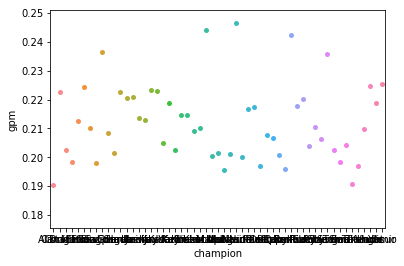

In [364]:
top_champions = []
gold_ratio = []
top_champ_gold_df = pd.DataFrame()
# We create a new dataframe with the necessary column values
for i in all_top.iterrows():
    top_champions.append(i[1]['topChamp'])
    ratio = i[1]["GPM"] / i[1]["teamGPM"]
    gold_ratio.append(ratio)

top_champ_gold_df['champion'] = top_champions
top_champ_gold_df['gpm'] = gold_ratio
top_champ_gold_df = top_champ_gold_df.groupby('champion', as_index = False)['gpm'].mean()

# The champions are sorted in alphabetical order, see the list here: https://na.leagueoflegends.com/en/game-info/champions/
sns.swarmplot(x= 'champion', y = 'gpm', data = top_champ_gold_df)
plt.show()

Now, We will calculate the KDA ratio for each champion. The KDA ratio is just (Kills+Assists)/Deaths.

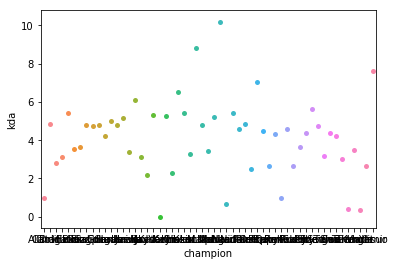

In [365]:
top_champions = []
kda_ratio = []
top_champ_kda_df = pd.DataFrame()
# We create a new dataframe with the necessary column values
for i in all_top.iterrows():
    top_champions.append(i[1]['topChamp'])
    if i[1]['Deaths'] == 0:
        ratio = i[1]['Assists'] + i[1]['Kills']
    else:
        ratio = (i[1]['Assists'] + i[1]['Kills']) / i[1]['Deaths']
    kda_ratio.append(ratio)

top_champ_kda_df['champion'] = top_champions
top_champ_kda_df['kda'] = kda_ratio
top_champ_kda_df.set_index('champion')
top_champ_kda_df = top_champ_kda_df.groupby('champion', as_index = False)['kda'].mean()

# The champions are sorted in alphabetical order, see the list here: https://na.leagueoflegends.com/en/game-info/champions/
sns.swarmplot(x= 'champion', y = 'kda', data = top_champ_kda_df)
plt.show()


Now, we will calculate the GPM and KDA for each champion that players have selected.

In [371]:
top_players = []
player_kda = []
# We create a new DataFrame with the selected columns we need. But first, we calculate the KDA ratio.
top_players_kda_df = pd.DataFrame()
for i in all_top.iterrows():
    top_players.append(i[1]['topChamp'])
    if i[1]['Deaths'] == 0:
        ratio = i[1]['Assists'] + i[1]['Kills']
    else:
        ratio = (i[1]['Assists'] + i[1]['Kills']) / i[1]['Deaths']
    player_kda.append(ratio)
top_players_kda_df['player'] = top_players
# We create a new column in our original dataframe to use "groupby"
all_top['kda'] = player_kda
top_players_kda_df = all_top.groupby(['topPlayer', 'topChamp'])['kda'].mean().reset_index()
top_players_kda_df.head()

,topPlayer,topChamp,kda
0,Allorim,Gragas,0.200000
1,Avalon,Chogath,0.800000
2,Avalon,Gnar,0.755556
3,Avalon,Hecarim,0.600000
4,Avalon,Kennen,6.500000


Let's plot! Let's take a look at the average KDA on champions played on some of our favorite players. Starting with... Dyrus!

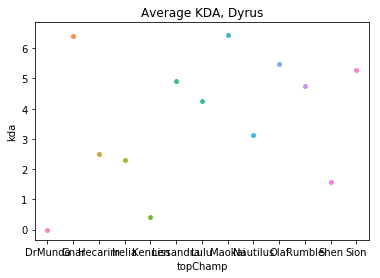

In [372]:
for label, df in top_players_kda_df.groupby('topPlayer'):
    if label == 'Dyrus':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Dyrus")

And now we look at Cris. We create a new dataframe to create a deep copy in order to not have overlapping swarmplots.

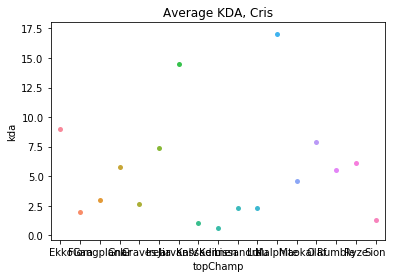

In [378]:
newDf = pd.DataFrame(top_players_kda_df)
for label, df in newDf.groupby('topPlayer'):
    if label == 'Cris':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Cris")

And here's Licorice

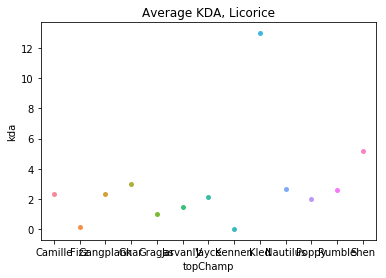

In [379]:
newDf2 = pd.DataFrame(newDf)
for label, df in newDf2.groupby('topPlayer'):
    if label == 'Licorice':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Licorice")

Now, let's look at GPM for all three players! We create a new DataFrame with the selected columns we need, and do the same thing.

In [381]:
top_players_gpm_df = pd.DataFrame()
gold_ratio = []
for i in all_top.iterrows():
    top_players.append(i[1]["topPlayer"])
    ratio = i[1]["GPM"] / i[1]["teamGPM"]
    gold_ratio.append(ratio)
top_players_gpm_df['player'] = top_players
# We create a new column in our original dataframe to use "groupby"
all_top['gpm_ratio'] = gold_ratio
top_players_gpm_df = all_top.groupby(['topPlayer', 'topChamp'])['gpm_ratio'].mean().reset_index()
top_players_gpm_df.head()

,topPlayer,topChamp,gpm_ratio
0,Allorim,Gragas,0.185841
1,Avalon,Chogath,0.194726
2,Avalon,Gnar,0.190804
3,Avalon,Hecarim,0.199107
4,Avalon,Kennen,0.209554


Let's plot! Let's take a look at the average GPM on champions on the previous players.

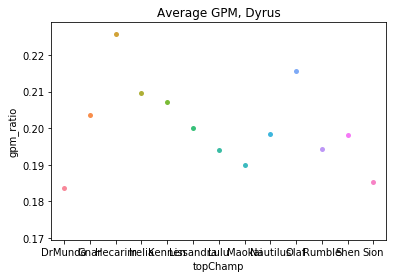

In [383]:
for label, df in top_players_gpm_df.groupby('topPlayer'):
    if label == 'Dyrus':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Dyrus")

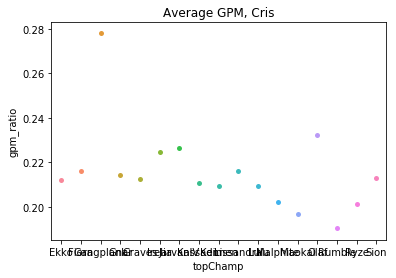

In [385]:
# Graph for Cris...
newDf = pd.DataFrame(top_players_gpm_df)
for label, df in top_players_gpm_df.groupby('topPlayer'):
    if label == 'Cris':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Cris")

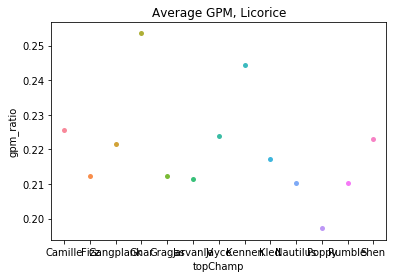

In [387]:
# Graph for Licorice...
newDf2 = pd.DataFrame(top_players_gpm_df)
for label, df in top_players_gpm_df.groupby('topPlayer'):
    if label == 'Licorice':
        ax = plt.axes()
        sns.swarmplot(x= 'topChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Licorice")

<h3>Analysis:</h3><br>
By looking at the graphs of Cris, there seems to be no difference in his picks. His average GPM and KDA match up really nicely with the averages for champions picked. For Dyrus, we see a really high average of GPM. Despite the league averages in GPM for 
top laners being fairly in the middle of the graph, Cris's GPM is really high. Looking at Licorice, we see a more scattered graph in comparison to the league wide averages. League-wide averages for the different champion's can be found <a href="https://www.leagueofgraphs.com/champions/stats">here</a> 

It seems like player performance is more of a result of an individual player, and not the champion. For context, these graphs make sense. Dyrus was never a star player, and it makes sense for him to perform average. Smeb has always been the star carry,his talent is indicated in his very high GPM despite what he picks. Licorice is a relatively young player, it makes sense for him to have a scattered graph, games where he does super well,and games where he struggles.

<h3>3.2 Middle-Lane Players</h3><br>

Similar to the Top-Lane, we will start by looking at the GPM ratio, as well as the KDA ratio
<h4>GPM Ratio</h4>

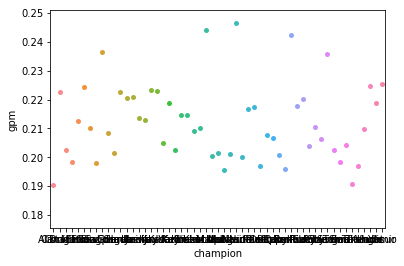

In [366]:
mid_champions = []
gold_ratio = []
mid_champ_gold_df = pd.DataFrame()
# We create a new dataframe with the necessary column values
for i in all_mid.iterrows():
    mid_champions.append(i[1]['middleChamp'])
    ratio = i[1]["GPM"] / i[1]["teamGPM"]
    gold_ratio.append(ratio)

mid_champ_gold_df['champion'] = mid_champions
mid_champ_gold_df['gpm'] = gold_ratio
mid_champ_gold_df = mid_champ_gold_df.groupby('champion', as_index = False)['gpm'].mean()

# The champions are sorted in alphabetical order, see the list here: https://na.leagueoflegends.com/en/game-info/champions/
sns.swarmplot(x= 'champion', y = 'gpm', data = top_champ_gold_df)
plt.show()

<h4>KDA Ratio</h4>

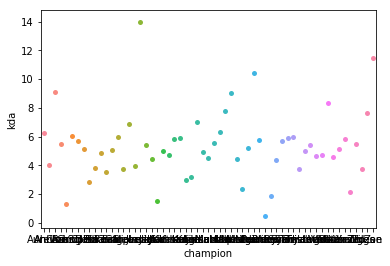

In [389]:
mid_champions = []
kda_ratio = []
mid_champ_kda_df = pd.DataFrame()
# We create a new dataframe with the necessary column values
for i in all_mid.iterrows():
    mid_champions.append(i[1]['middleChamp'])
    if i[1]['Deaths'] == 0:
        ratio = i[1]['Assists'] + i[1]['Kills']
    else:
        ratio = (i[1]['Assists'] + i[1]['Kills']) / i[1]['Deaths']
    kda_ratio.append(ratio)

mid_champ_kda_df['champion'] = mid_champions
mid_champ_kda_df['kda'] = kda_ratio
mid_champ_kda_df.set_index('champion')
mid_champ_kda_df = mid_champ_kda_df.groupby('champion', as_index = False)['kda'].mean()

# The champions are sorted in alphabetical order, see the list here: https://na.leagueoflegends.com/en/game-info/champions/
sns.swarmplot(x= 'champion', y = 'kda', data = mid_champ_kda_df)
plt.show()

Now, we will calculate the GPM and KDA for each champion that players have selected.
<h4>Average KDA for Selected Players</h4>

In [397]:
mid_players = []
player_kda = []
# We create a new DataFrame with the selected columns we need. But first, we calculate the KDA ratio.
mid_players_kda_df = pd.DataFrame()
for i in all_mid.iterrows():
    mid_players.append(i[1]['middleChamp'])
    if i[1]['Deaths'] == 0:
        ratio = i[1]['Assists'] + i[1]['Kills']
    else:
        ratio = (i[1]['Assists'] + i[1]['Kills']) / i[1]['Deaths']
    player_kda.append(ratio)
mid_players_kda_df['player'] = mid_players
# We create a new column in our original dataframe to use "groupby"
all_mid['kda'] = player_kda
mid_players_kda_df = all_mid.groupby(['middlePlayer', 'middleChamp'])['kda'].mean().reset_index()
mid_players_kda_df.head()

,middlePlayer,middleChamp,kda
0,Abou222,Orianna,1.500000
1,Abou222,Syndra,1.857143
2,Alex Ich,Azir,1.000000
3,Alex Ich,Corki,3.000000
4,Alex Ich,Karma,6.166667


Now let's look at some players up close. We will be looking at Link, Hai, and Bjergsen for the Middle-Lane players.

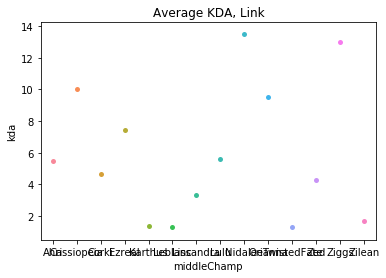

In [399]:
for label, df in mid_players_kda_df.groupby('middlePlayer'):
    if label == 'Link':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Link")

Next, let's do Hai

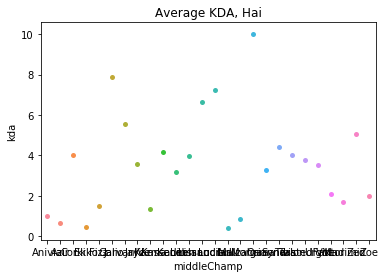

In [400]:
for label, df in mid_players_kda_df.groupby('middlePlayer'):
    if label == 'Hai':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Hai")

And last but not least, Bjergsen!

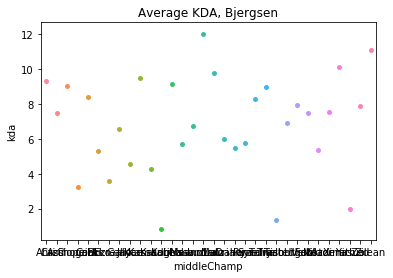

In [401]:
for label, df in mid_players_kda_df.groupby('middlePlayer'):
    if label == 'Bjergsen':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'kda', data = df, ax = ax)
        ax.set_title("Average KDA, Bjergsen")

Now, let's move on to the average GPM
<h4>Average GPM for Selected Players</h4>

In [404]:
mid_players_gpm_df = pd.DataFrame()
gold_ratio = []
for i in all_mid.iterrows():
    mid_players.append(i[1]["middlePlayer"])
    ratio = i[1]["GPM"] / i[1]["teamGPM"]
    gold_ratio.append(ratio)
mid_players_gpm_df['player'] = mid_players
# We create a new column in our original dataframe to use "groupby"
all_mid['gpm_ratio'] = gold_ratio
mid_players_gpm_df = all_mid.groupby(['middlePlayer', 'middleChamp'])['gpm_ratio'].mean().reset_index()
mid_players_gpm_df.head()

,middlePlayer,middleChamp,gpm_ratio
0,Abou222,Orianna,0.242424
1,Abou222,Syndra,0.223208
2,Alex Ich,Azir,0.238478
3,Alex Ich,Corki,0.242867
4,Alex Ich,Karma,0.201539


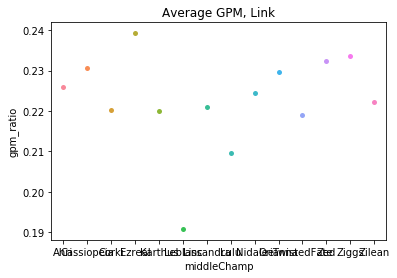

In [414]:
for label, df in mid_players_gpm_df.groupby('middlePlayer'):
    if label == 'Link':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Link")

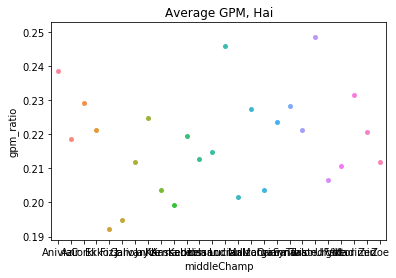

In [416]:
newDf = pd.DataFrame(mid_players_gpm_df)
for label, df in mid_players_gpm_df.groupby('middlePlayer'):
    if label == 'Hai':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Hai")

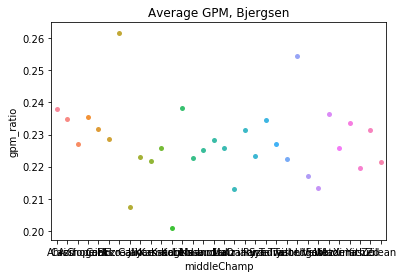

In [421]:
newDf2 = pd.DataFrame(mid_players_gpm_df)
for label, df in mid_players_gpm_df.groupby('middlePlayer'):
    if label == 'Bjergsen':
        ax = plt.axes()
        sns.swarmplot(x= 'middleChamp', y = 'gpm_ratio', data = df, ax = ax)
        ax.set_title("Average GPM, Bjergsen")

<h3>Analysis:</h3><br>
When you look at the Average KDA graph for link, his graph is scattered throughout. Sometimes he performs consistenly high, and other times he performs average. Hai performs around the same for GPM and KDA for his champions and performs near the average performance for the champions. Bjergsen on the other hand has a consistently higher KDA than average no matter what champion he selects. This shows that he consistenly performs well, despite what he picks, which can show a loose evidence that his wins are by skill and not so much who he is playing.
It seems like player performance is more of a result of an individual player, and not the champion. For context, these graphs make sense. Again, for more information on the champion's average statistics, click <a href="https://www.leagueofgraphs.com/champions/stats">here</a> 

<h3>3.3 Jungle Players</h3><br>
Lets take a look at each jungle champ and how well the players manage to get gold with it in game. The gold per minute we are looking at is the ratio between the player's gold farmed per minute and the player's team. Ratio: (playerGPM) / (teamGPM)

In [424]:
blueJungle_teamGold = lcs_matches.loc[:, lcs_matches.columns.isin(['blueJungle','blueJungleChamp','goldblue','gamelength'])]
redJungle_teamGold = lcs_matches.loc[:, lcs_matches.columns.isin(['redJungle','redJungleChamp','goldred','gamelength'])]

blue_GPM = []
for i in blueJungle_teamGold.iterrows():
    teamStrList = i[1][1].strip('[').strip(']').replace(',', '').split()
    teamStrList = [int(i) for i in  teamStrList]
    teamStrList = np.diff(teamStrList)
    blue_GPM.append(math.ceil(sum(teamStrList)/game_length))
    
blueJungle_teamGold.is_copy = None
blueJungle_teamGold = blueJungle_teamGold.drop(columns = 'goldblue')
blueJungle_teamGold['teamGPM'] = blue_GPM
blueJungle_teamGold['playerGPM'] = blue_jung['GPM']
blueJungle_teamGold = blueJungle_teamGold.rename(columns ={'blueJungle':'jungle','blueJungleChamp':'jungle_champ'})
blueJungle_teamGold['kill'] = blue_jung['kills']
blueJungle_teamGold['death'] = blue_jung['deaths']
blueJungle_teamGold['assist'] = blue_jung['assists']

red_GPM = []
for i in redJungle_teamGold.iterrows():
    teamStrList = i[1][1].strip('[').strip(']').replace(',', '').split()
    teamStrList = [int(i) for i in  teamStrList]
    teamStrList = np.diff(teamStrList)
    red_GPM.append(math.ceil(sum(teamStrList)/game_length))
    
redJungle_teamGold.is_copy = None
redJungle_teamGold = redJungle_teamGold.drop(columns = 'goldred')
redJungle_teamGold['teamGPM'] = red_GPM
redJungle_teamGold['playerGPM'] = red_jung['GPM']
redJungle_teamGold['kill'] = red_jung['kills']
redJungle_teamGold['death'] = red_jung['deaths']
redJungle_teamGold['assist'] = red_jung['assists']
redJungle_teamGold = redJungle_teamGold.rename(columns ={'redJungle':'jungle','redJungleChamp':'jungle_champ'})

all_jungleGPM = pd.concat([blueJungle_teamGold, redJungle_teamGold])
all_jungleGPM 

player_team = []
kda_score = []
for i in all_jungleGPM.iterrows():
    player_team.append(i[1][4]/i[1][3])
    deaths = i[1][6]
    if(deaths == 0):
        deaths = 1
    kda_score.append(i[1][5] + i[1][7]/deaths)

all_jungleGPM ['playerTeamGPM'] = player_team
all_jungleGPM ['kda'] = kda_score
all_jungleGPM.head()

,gamelength,jungle,jungle_champ,teamGPM,playerGPM,kill,death,assist,playerTeamGPM,kda
0,40,Santorin,RekSai,1437,269,1,5,13,0.187196,3.600000
1,38,Impaler,Rengar,1317,269,1,2,7,0.204252,4.500000
2,40,ShorterACE,Rengar,1616,265,1,3,13,0.163985,5.333333
3,41,Rush,JarvanIV,1339,261,1,6,8,0.194922,2.333333
4,35,Xmithie,JarvanIV,1378,304,3,2,15,0.220610,10.500000


Lets take a look at each jungle champ and how well the players manage to get gold with it in game. The gold per minute we are looking at is the ratio between the player's gold farmed per minute and the player's team. Ratio: (playerGPM) / (teamGPM)

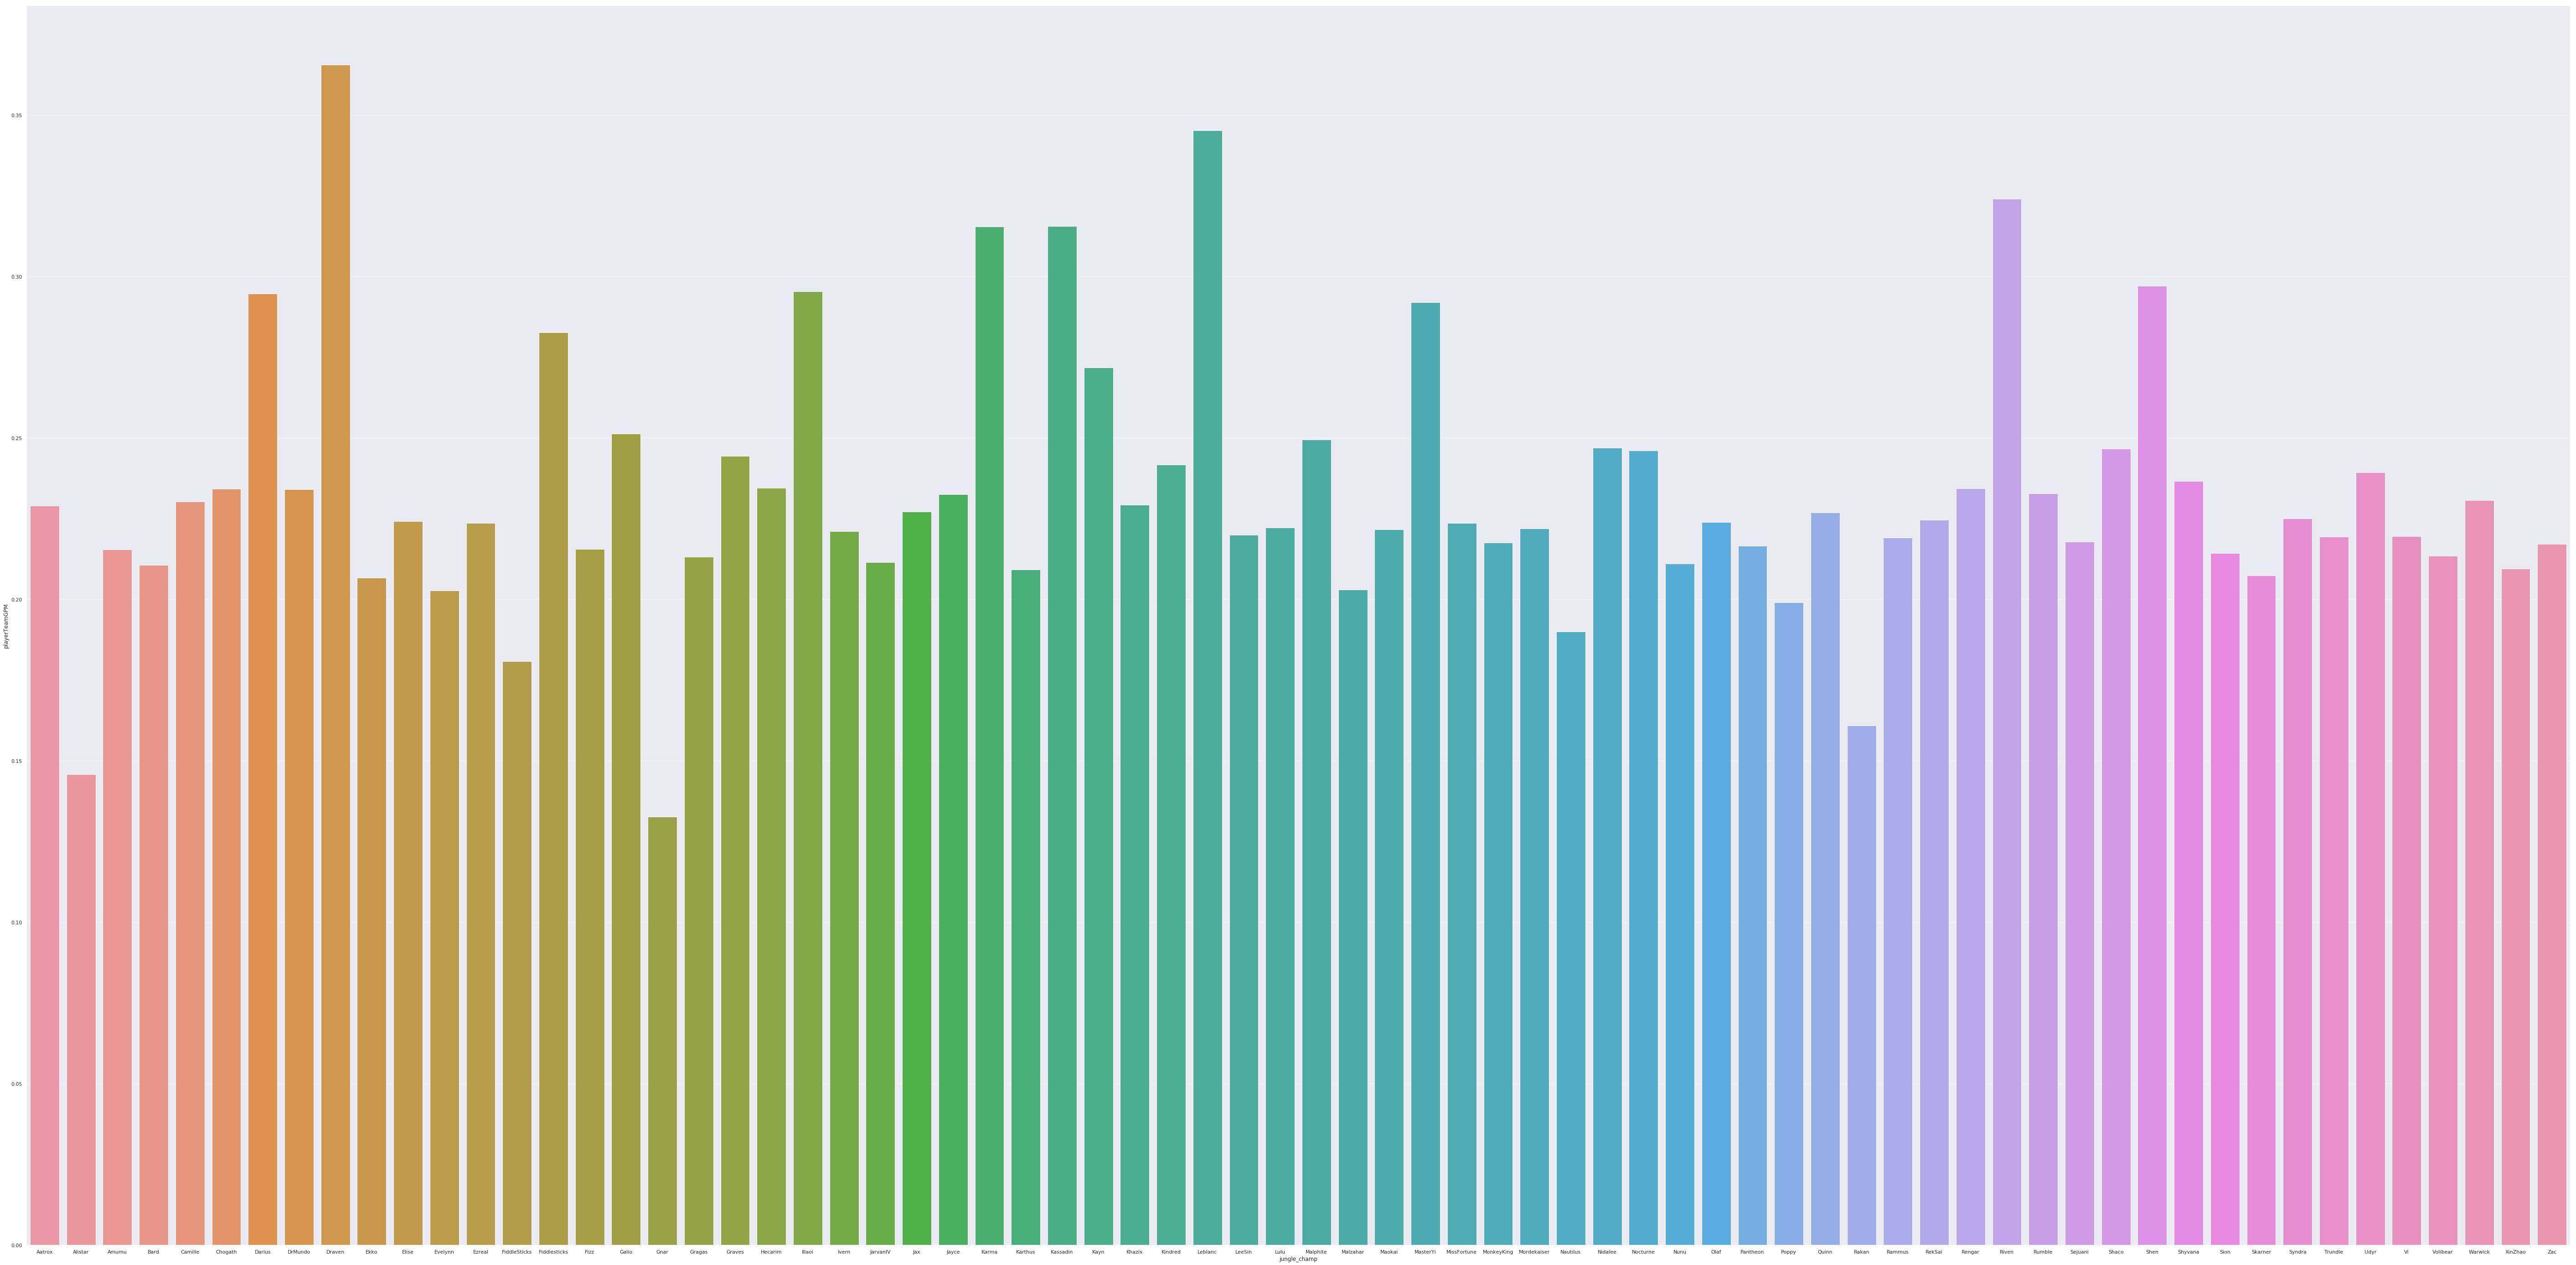

In [425]:
all_jGPM = all_jungleGPM.groupby('jungle_champ', as_index = False)['playerTeamGPM'].mean()

sns.set(rc={'figure.figsize':(100,50)})
sns.barplot(x= 'jungle_champ', y = 'playerTeamGPM', data = all_jGPM)
plt.show() 

As you can see, every bar represents a champion, and each shade of color represents a different champion that starts from the left for champions that have names starting with As, next is Bs, and etc. The X-axis represents the champion's name alphabetically. Therefore, as X increases, you will approach champions with names after A, B, C, and etc. The champions are sorted in alphabetical order in this list here: <a href="https://na.leagueoflegends.com/en/game-info/champions/">here</a>. Additionally, some champions are better than others at gaining gold per minute. The higher the dots go on the Y-axis, the better they gain gold per minute. However, we can see that the majority of champions in league of legends have between 0.20 to 0.25 gold per minute ratio to team's gold per minute. 

Lets examine peanut, who has some of the highest gold per min to team ratio
He was one of the best junglers in LCS, lets explore his KDA as a jungle role.

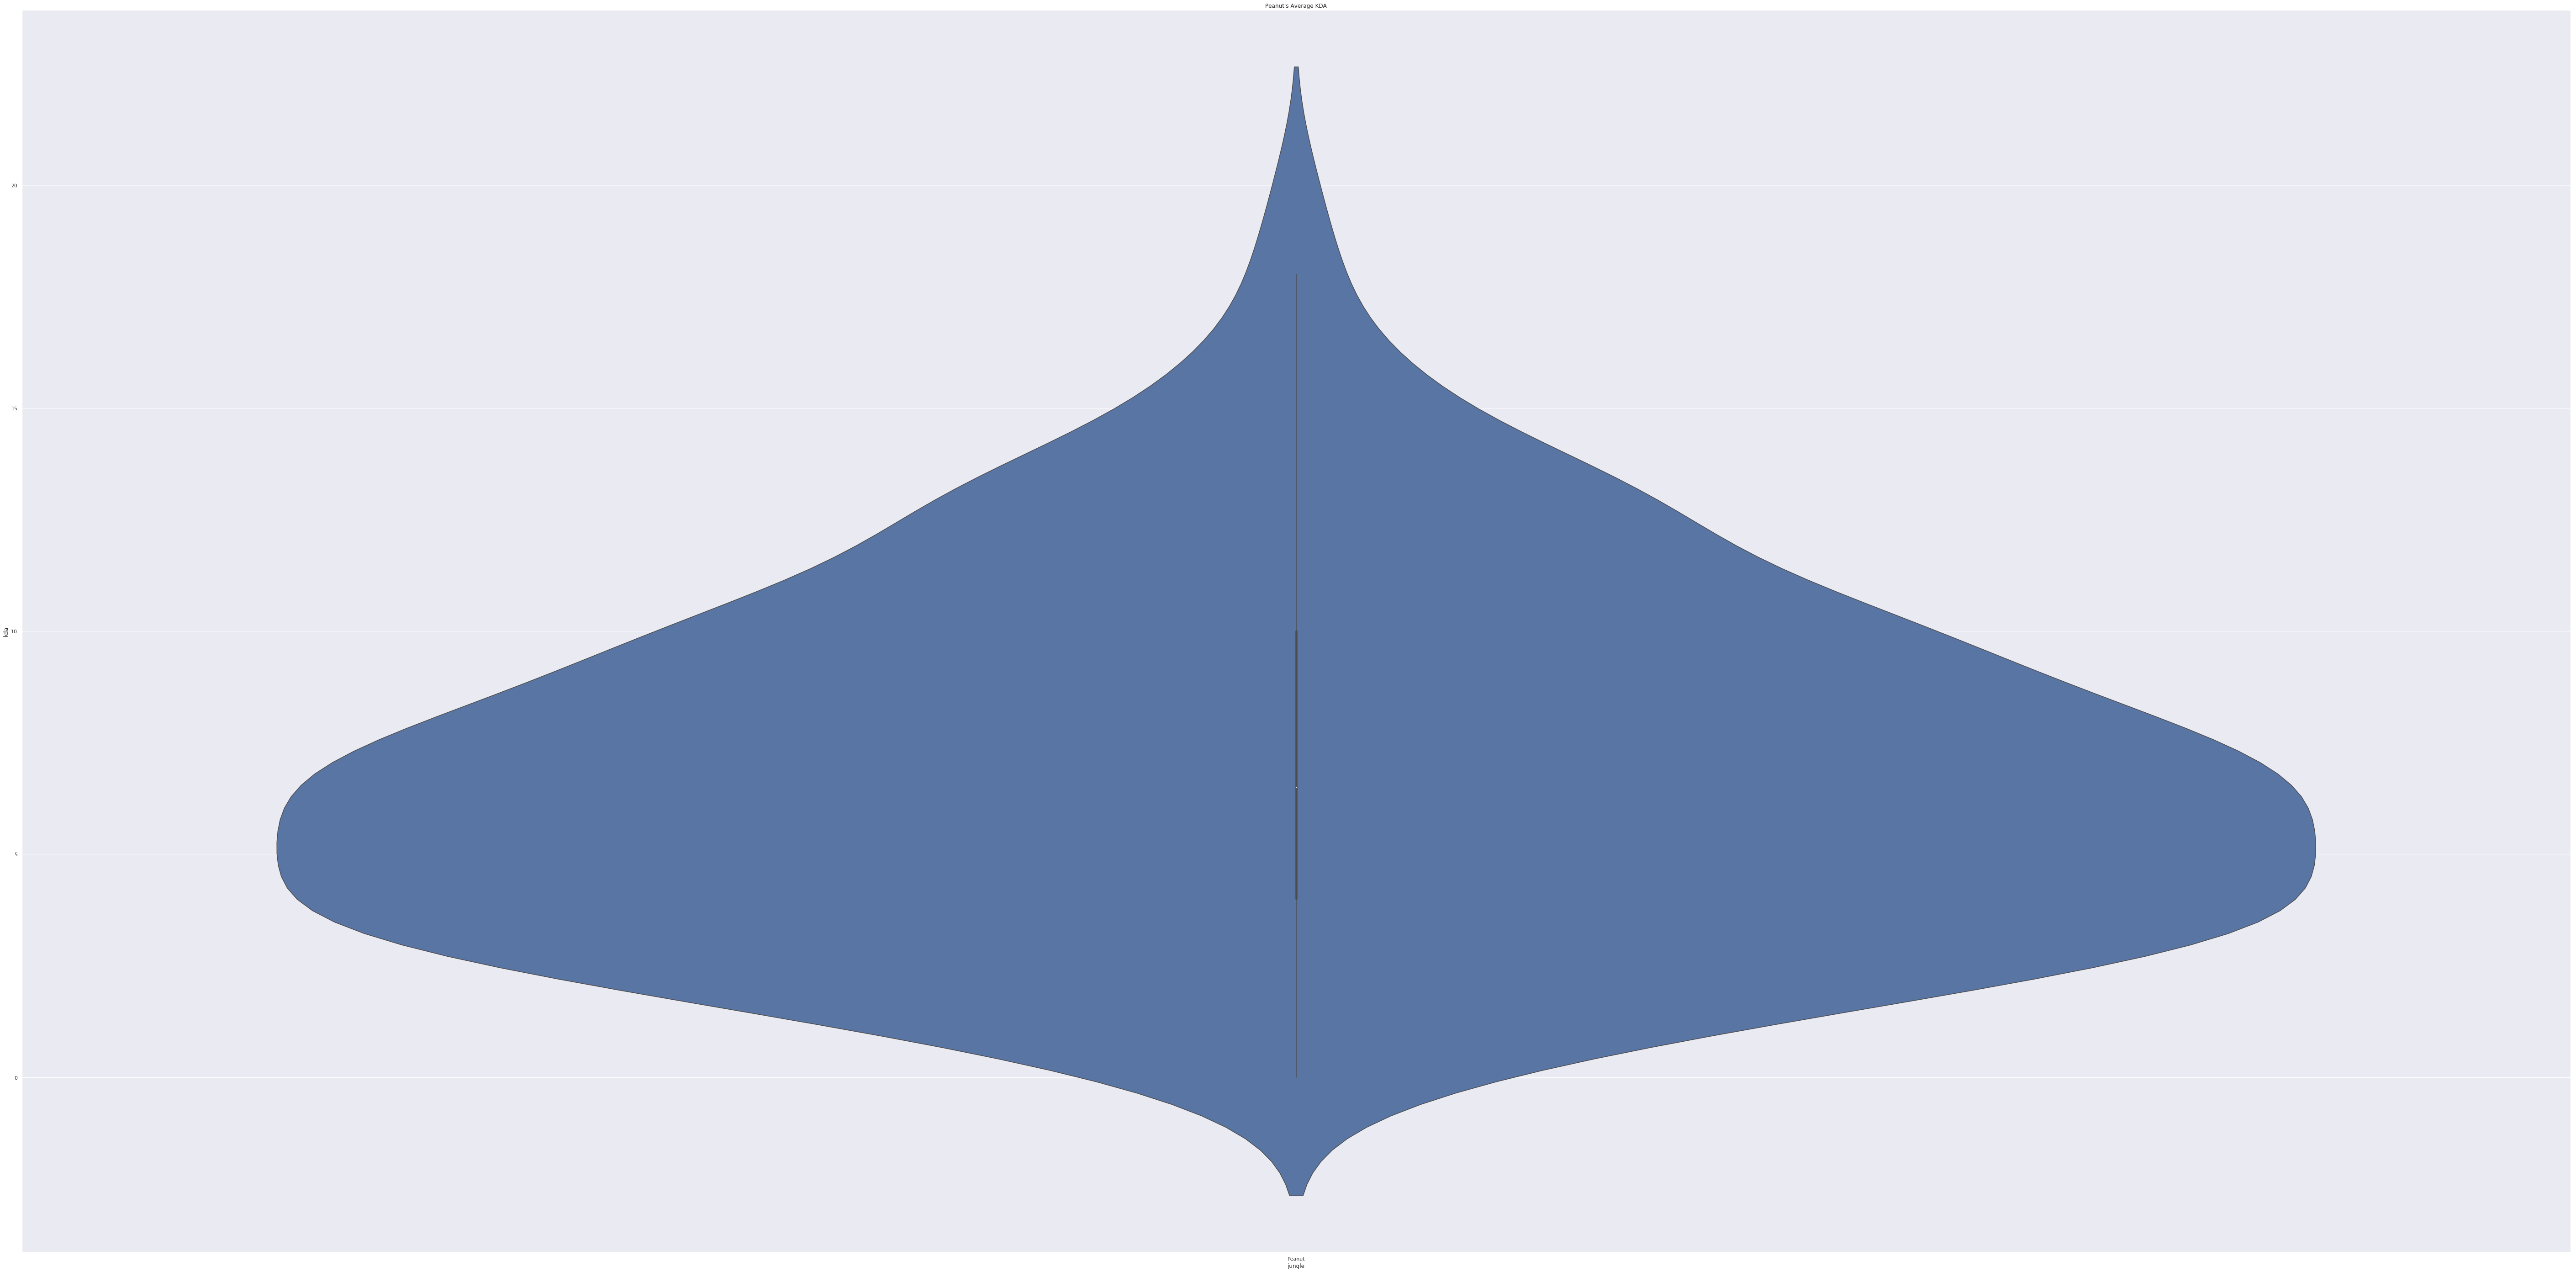

In [426]:
for label, df in all_jungleGPM.groupby('jungle'):
    if label == 'Peanut':
        ax = plt.axes()
        sns.set(rc={'figure.figsize':(20,30)})
        sns.violinplot(x= 'jungle', y = 'kda', data = df, ax = ax)
        ax.set_title("Peanut's Average KDA")

This graph shows peanut's average kda as a jungler. We see that the violin plot shows that peanut usually gets a KDA score of 4-5. And his KDA being 10 is pretty high too, it is not as wide as 4-5, but it is still good. This means that Peanut is a strong jungler, with good overall KDA ratio for all his champions.<br><br>

Now let's examine Peanut's performance based on the champion he plays jungle with.

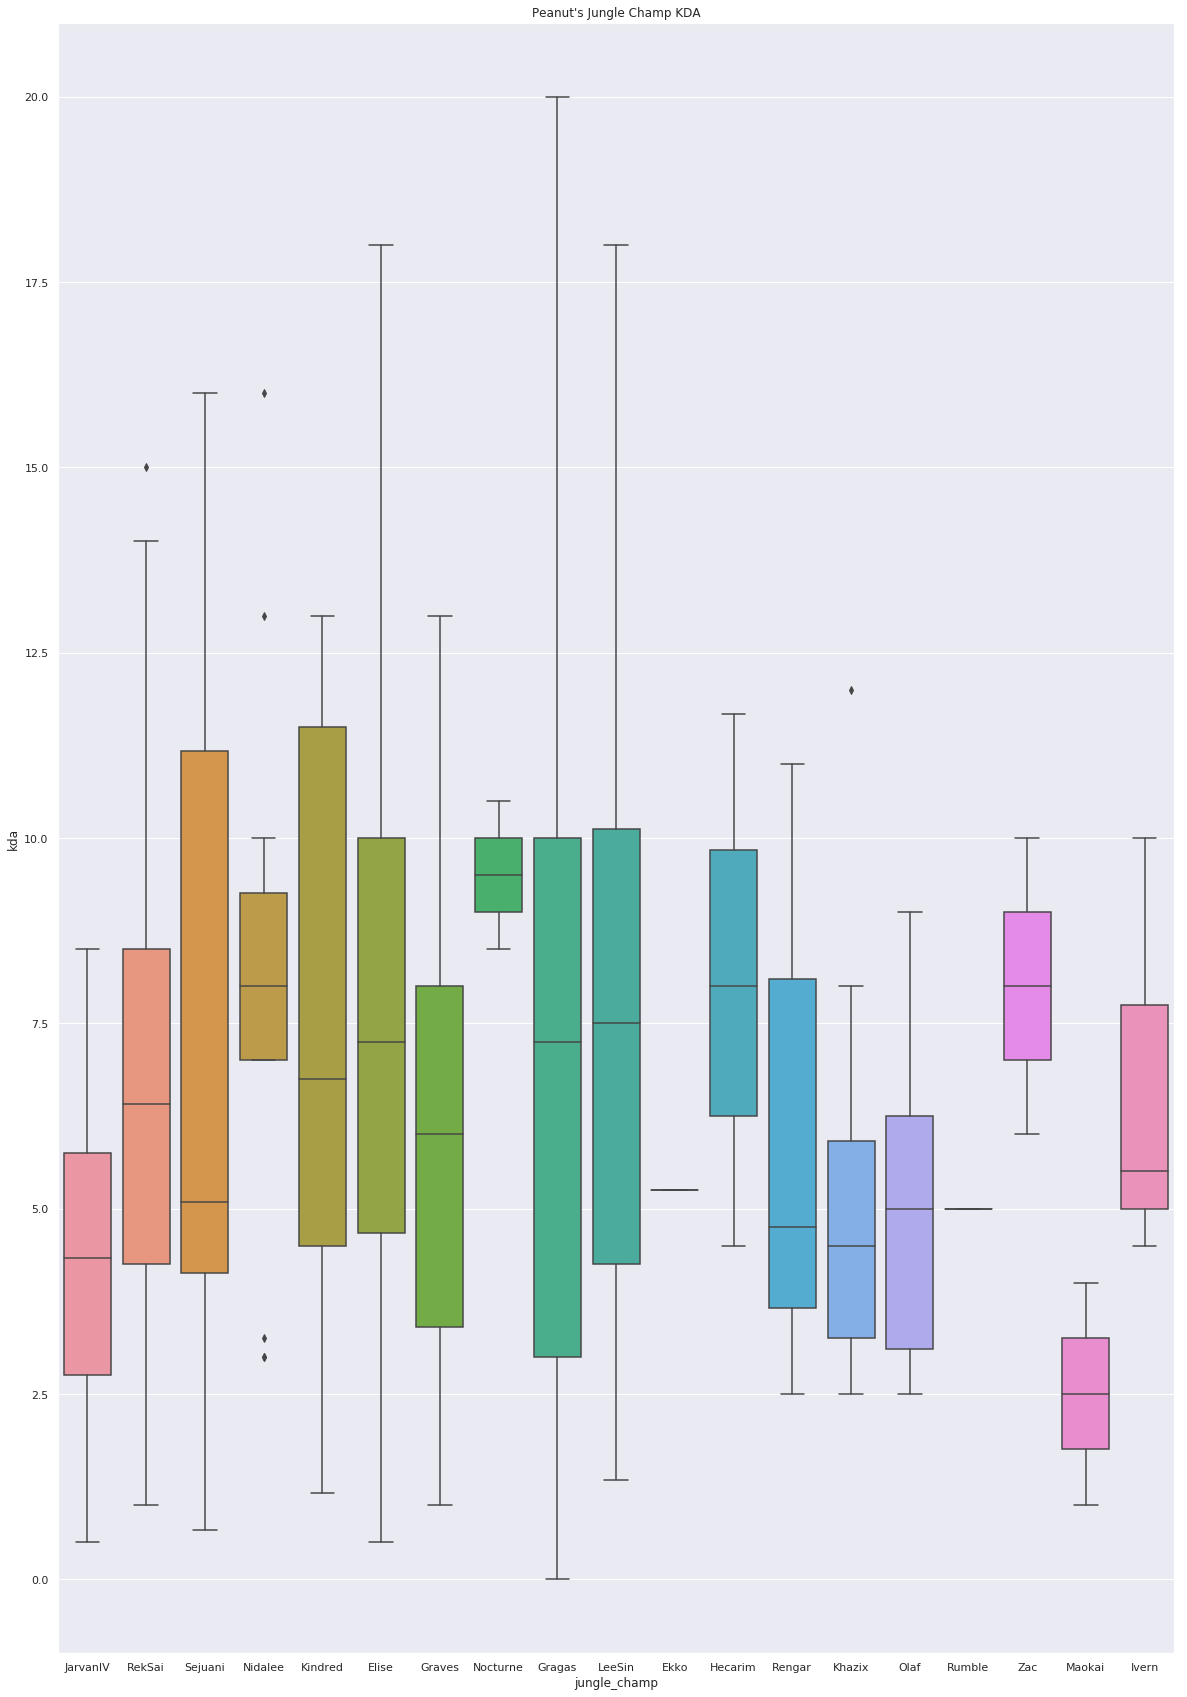

In [427]:
for label, df in all_jungleGPM.groupby('jungle'):
    if label == 'Peanut':
        ax = plt.axes()
        sns.set(rc={'figure.figsize':(30,30)})
        sns.boxplot(x= 'jungle_champ', y = 'kda', data = df, ax = ax)
        ax.set_title("Peanut's Jungle Champ KDA")

As you can see, many of Peanut's favorite champions like Gragas, Lee Sin has a consistent KDA ratio. While the champions he play less show less consistent results. However, this also shows that Peanut has a decent number of champions in his pool to select from if his most played champion is banned in that game. This also means that Peanut is very flexible when he is not able to play his best champions with consistent KDA scores.<br> <br>

Lets examine Peanut's performance when he plays Gragas and his gold per minute contribution ratio to his team's gold per minute.

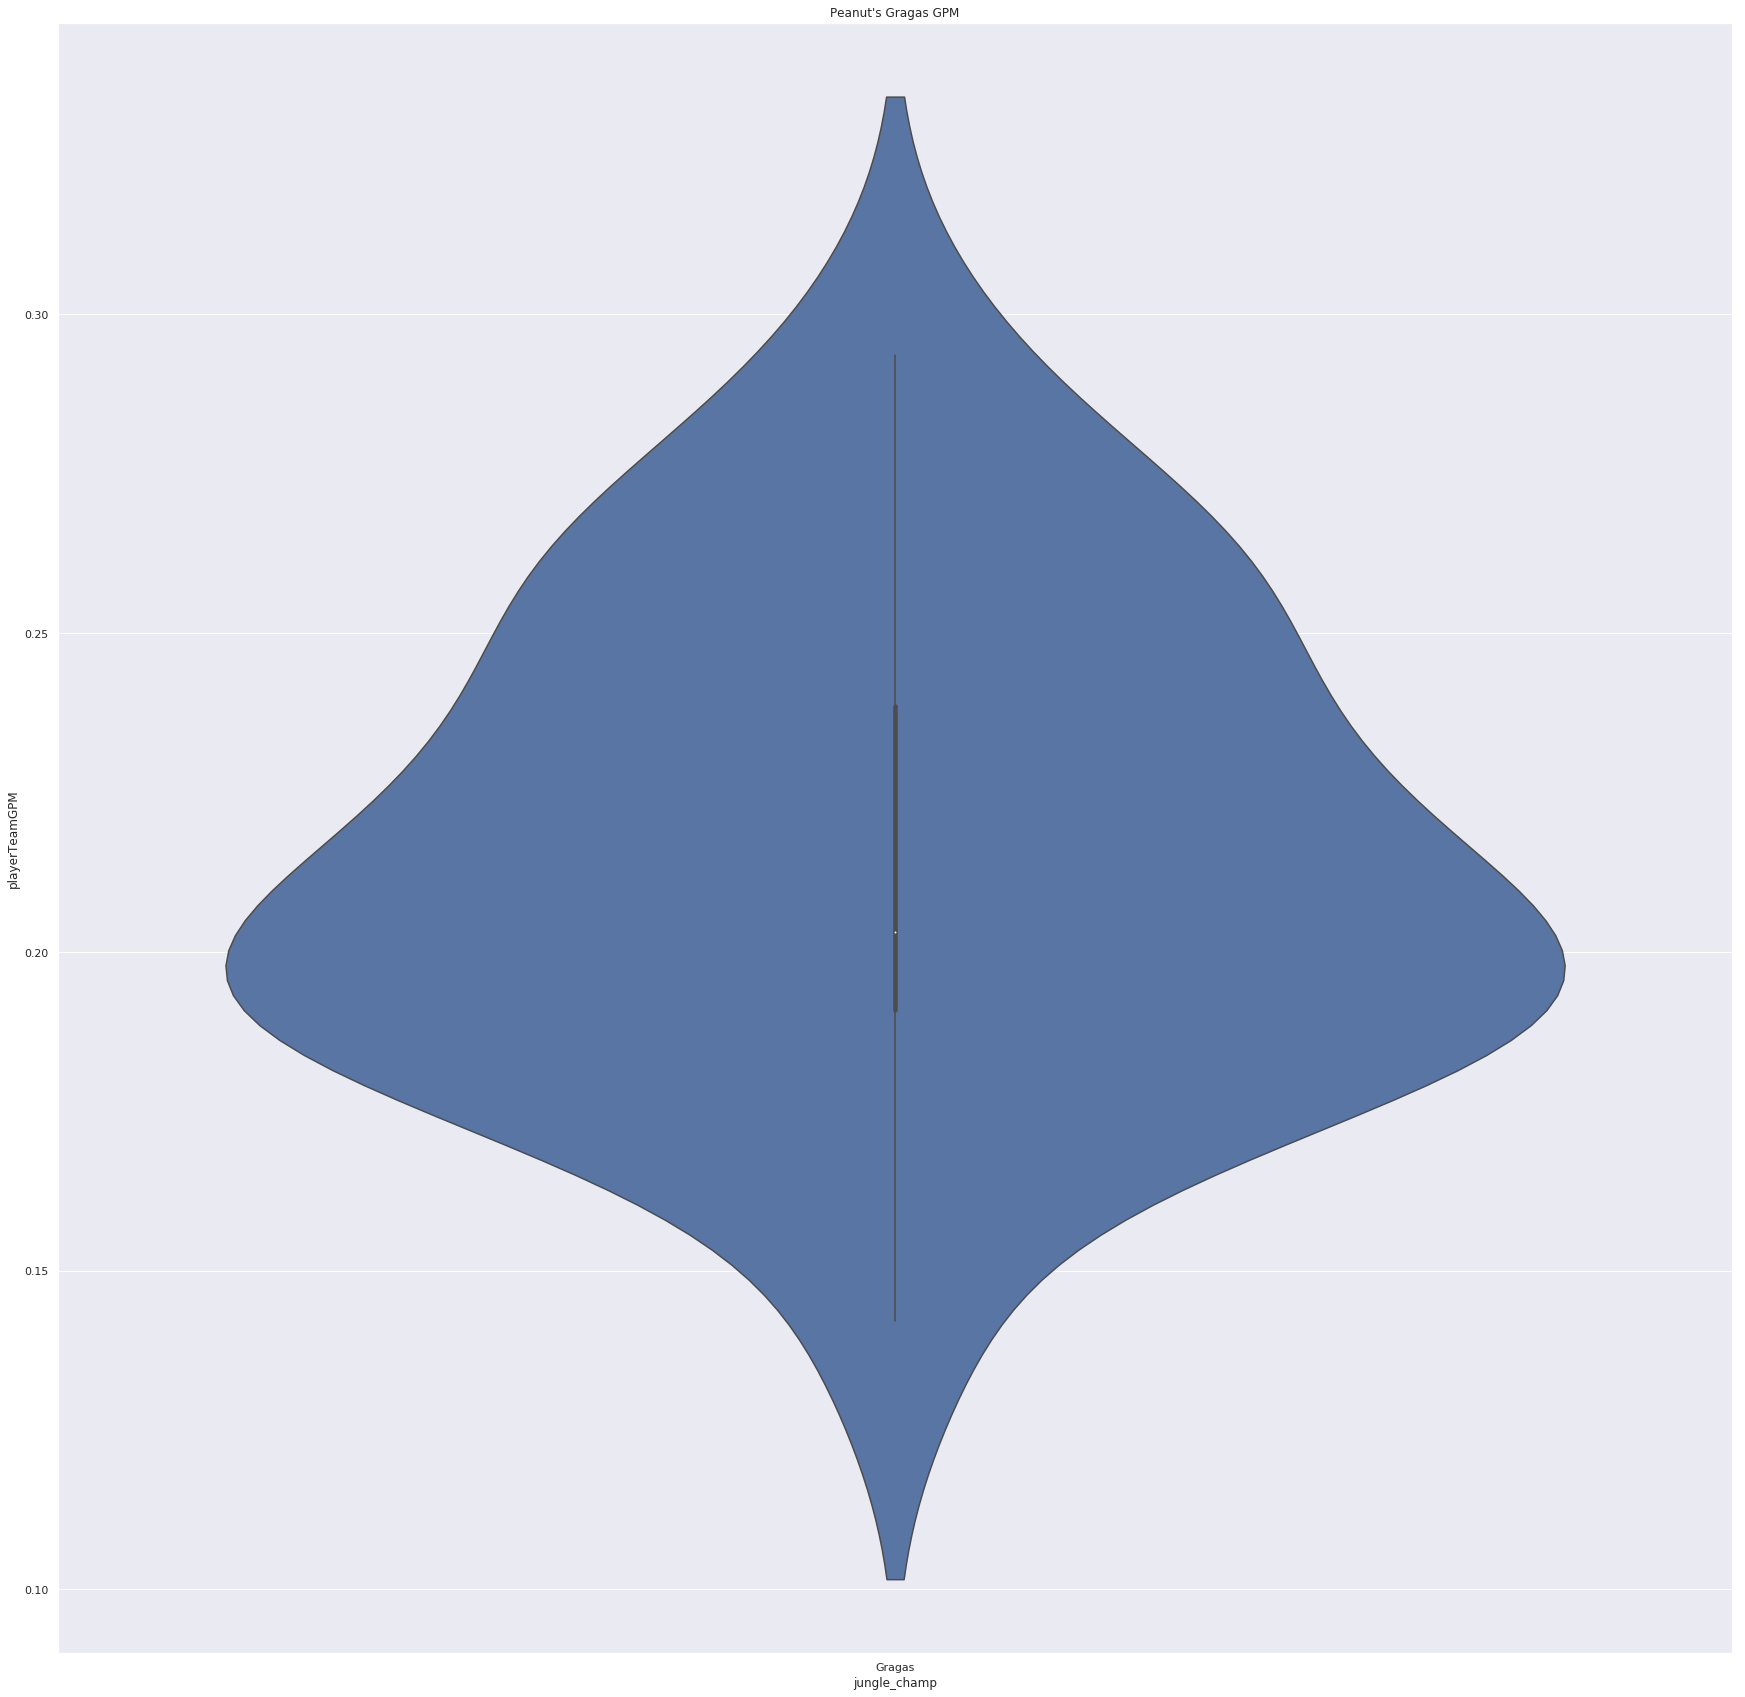

In [428]:
for label, df in all_jungleGPM.groupby('jungle'):
    if label == 'Peanut':
        for l, d in df.groupby('jungle_champ'):
            sns.set(rc={'figure.figsize':(30,30)})
            if l == 'Gragas':
                ax = plt.axes()
                sns.violinplot(x= 'jungle_champ', y = 'playerTeamGPM', data = d, ax = ax)
                ax.set_title("Peanut's Gragas GPM")

The violin plot shows that when Peanut plays Gragas, his GPM with the team is around 0.2, which is really good for a jungler.<br><br>

Lets take a look at a different jungler, Xmithie, who is also a strong jungler with a good GPM to team GPM ratio.

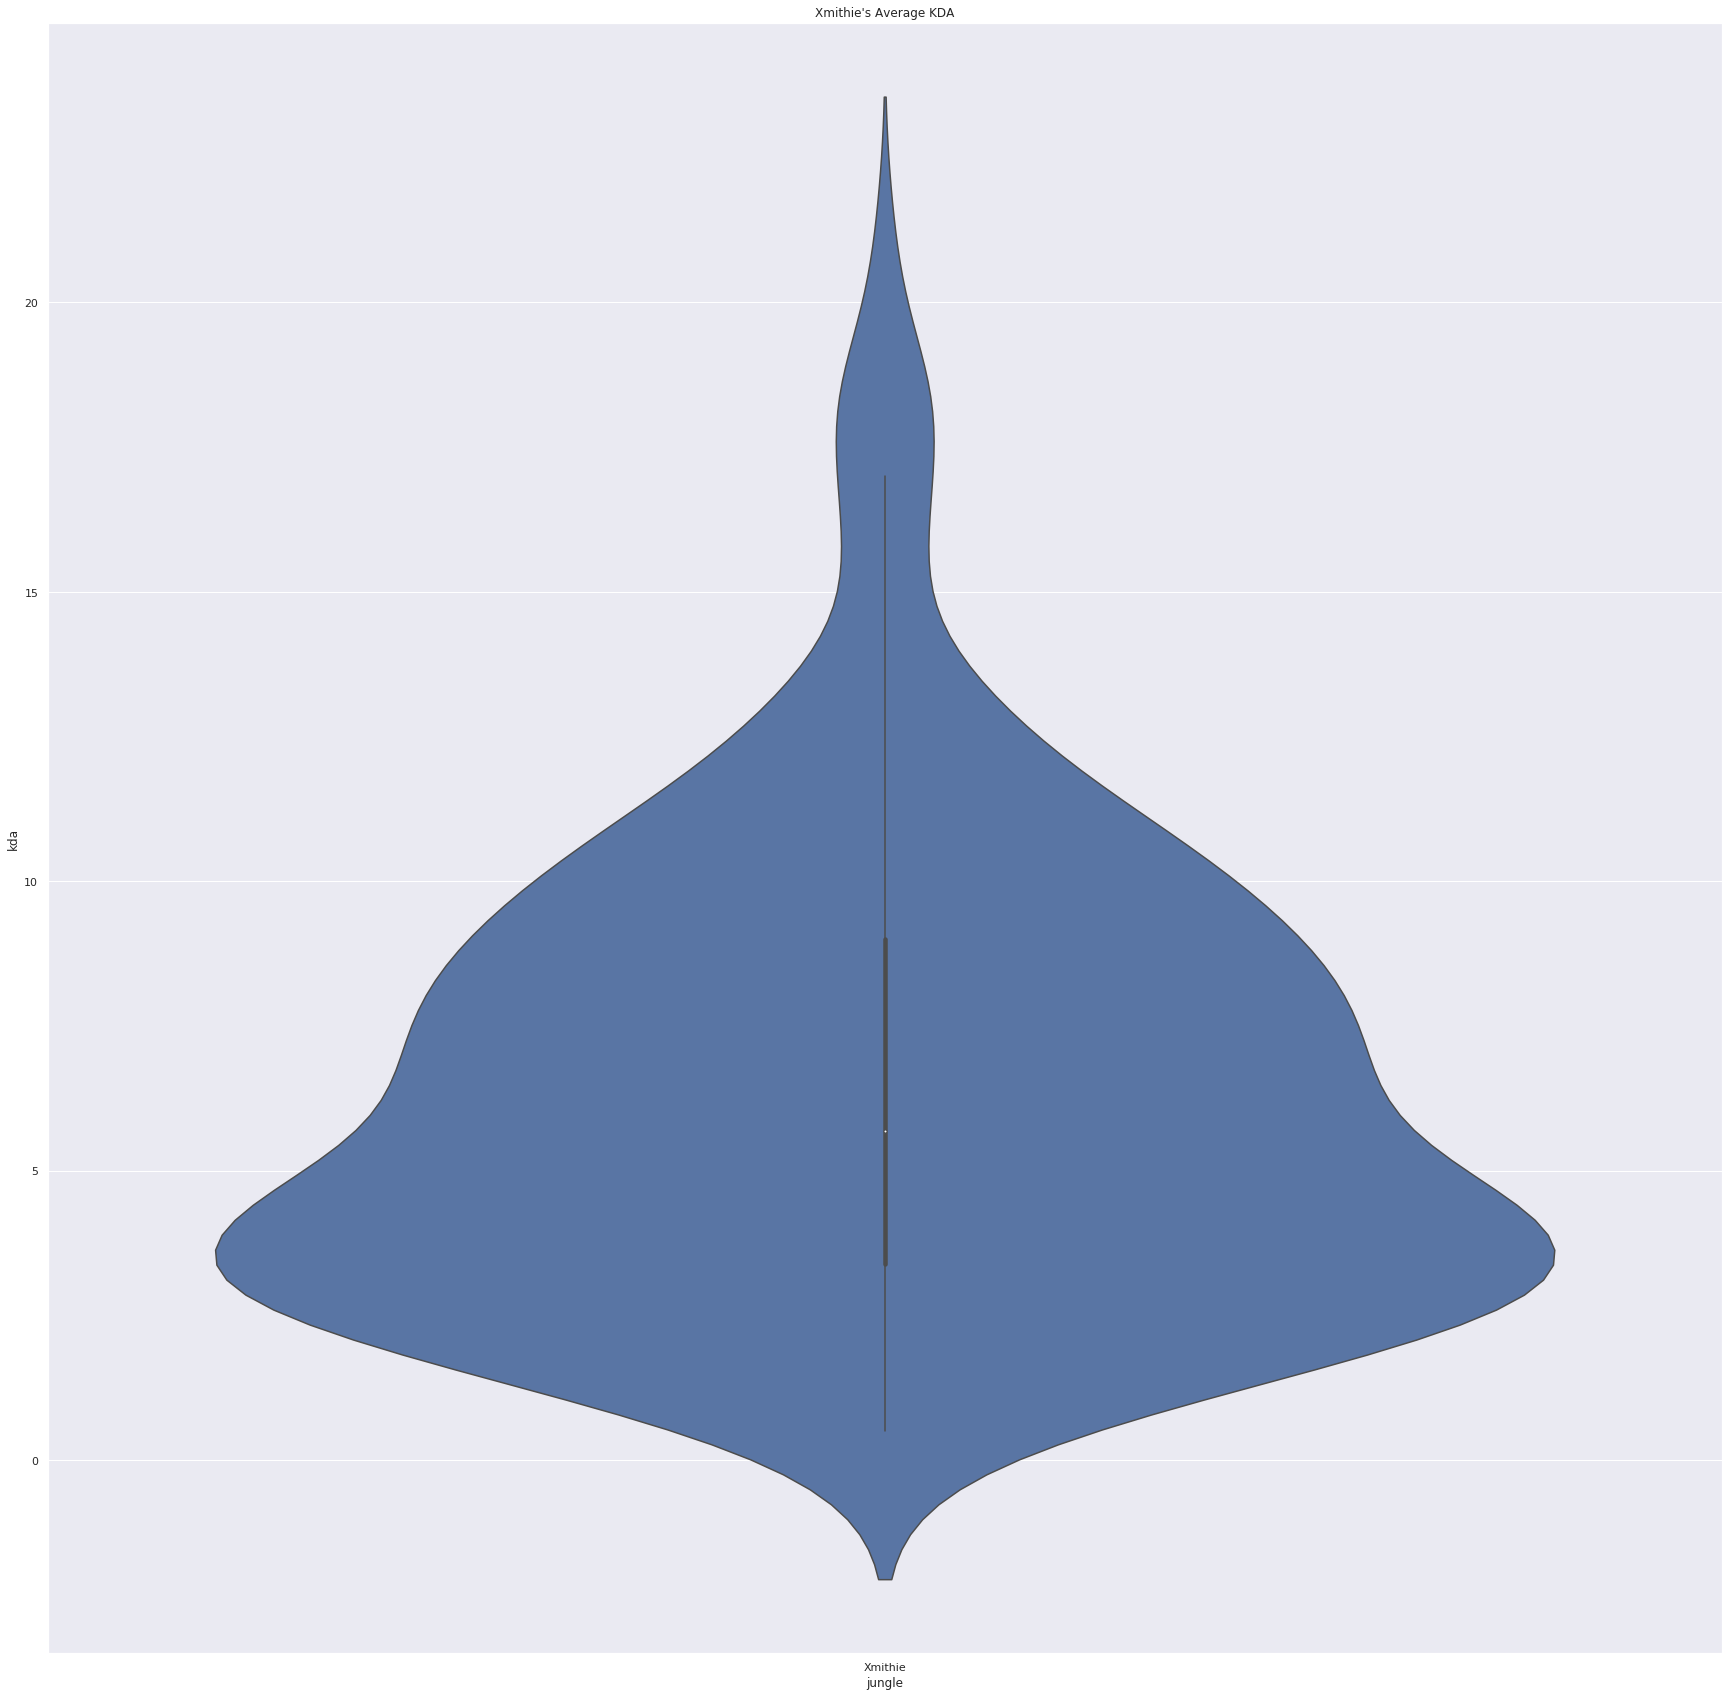

In [429]:
for label, df in all_jungleGPM.groupby('jungle'):
    if label == 'Xmithie':
        ax = plt.axes()
        sns.set(rc={'figure.figsize':(20,30)})
        sns.violinplot(x= 'jungle', y = 'kda', data = df, ax = ax)
        ax.set_title("Xmithie's Average KDA")

From the violin plot you will see that Xmithie's average KDA seemed to be higher than Peanut's because the widest part of is above 5, and it is wider at the top approaching 10, whereas Peanut is fairly consistent between 4-5 and steeper starting from 5. However, we see that KDA between the two is similar above 10.<hr>

<h3>Analysis</h3><br>
If we look at Gragas played by both Xmithie and Peanut, the champion Gragas is performing better, with higher consistent KDA results when played by Peanut. When we looked at GPM for Xmithie and Peanut, we see that Xmithie has better GPM.
However, Peanut has better KDA, therefore GPM is not as of a strong predictor for performance as KDA. We did not show other players because it was too many graphs to plot, but there have similar traits. The pattern appears on other champions as well. For example, Lee Sin's average KDA was much lower for Xmithie when compared with Peanut, who is more skilled with the champion. We expect this to happen a lot more often for other champions as well.<br>
It feels like the strength of a champion is really determined by the player using it. It is not based on the design of the champion but rather the decisions that the players using them makes that utilize its abilities to its pull potential. KDA is also heavily influenced on team composition, but LCS players have a good intuition of picking champions that can do well in a match. 

<h3>3.4  Try it Yourself!</h3><br>
Now that we have shown you different ways to analyze the dataset. Try it with the dataframes you made for support and jungle! What other relationships and trends can you find? Try different data visualizations. Some examples of great data visualizations using seaborn can be found  <a href="https://seaborn.pydata.org/examples/index.html">here</a> <hr>

<a id='4'></a>
<h2> 5. Conclusion and Evaluation</h2>

We found that the real power of each champion in League of Legends
is only unlocked by the player using it. The champion's performance
depends more on the player. The KDA results and GPM confirms this.
Therefore, even if the champion is performing poorly, we should not
blame the champion, and have the player work on to improving his/her
skills of pushing that champion to the limit.<br><br>
We hope the league of legends fans learned alot about the performances of professional players in the NALCS and that new-comers to League develop a deeper interest in the game and it's many intracies. There is so much more to explore with the game and we hope that this tutorial serves as a stepping stone for further analysis of the game.
